In [26]:
#Librairies que nous allons utiliser
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
import cma
import cma.purecma as purecma

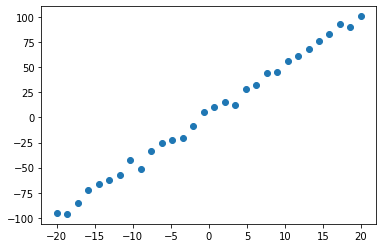

In [4]:
"""
Ici, nous avons crée des données jouets qui servirons d'entrainement pour apprendre les différentes façons
d'entrainer un modèle a réduire une fitness.
Donc notre fitnesse c'est 
"""
#Creations de données jouées 
x = np.linspace(-20,20,30).reshape((-1,1))
y = 5 * x + 3 + np.random.normal(0,5,x.shape)
y = y.reshape((-1,1))
plt.scatter(x,y)

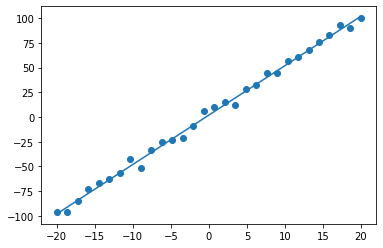

In [5]:
#Tracage d'une droite dans un le nuage de point
"""
Supposons que l'on ait trouvé un modèle w = a,b tel que la prédiction serrait égale y = ax + b.
Pour le tester on pourra utiliser cette fonction.
Remarque : w doit être un vecteur colonne et x un vecteur ligne pour que le produit sur les différents x
donne les prédictions du modèle.
"""

def predictions(w,x):
    ypredict = np.dot(x,w.T)
    return ypredict
    
"""
Cette fonction ajoute simple une colonne de 1 pour que chaque produit de x par un w donne x0 * a + b *1 c'est a
a dire a*x0+b.
"""
def adapt(X):
    return np.hstack((X,np.ones((X.shape[0],1))))  

#D'abord on affiche le nuage
plt.scatter(x,y)
#Ensuite on ajoute le tracé
ypred = predictions(np.array([5,2]),adapt(x)) #Donc la je test a = 5, b = 2 parce que je les connaits
plt.plot(x,ypred)
plt.show()

Donc le modèle qu'on trouve est :  [[4.98918465 2.78468449]]


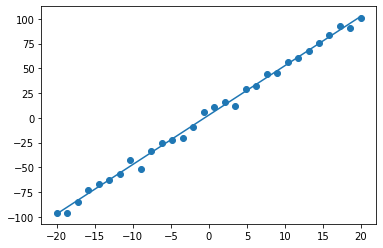

In [7]:
#Résolution direct d'une regression linéaire
"""
Donc la l'objectif clairement c'est de retourver les coefficients de la droite de regression linéaire en utilisant
une résolution algébrique.
Rappel : 
    - Résoudre un systeme Xw = B reviens a trouver x c'est a dire A^-1*B (donc calculer l'inverse de A par B)
    - En Python, pour calculer l'inverse on fait : np.linalg.pinv(A) (pseudo-inversion)
"""
w = np.dot(np.linalg.pinv(adapt(x).T.dot(adapt(x))),adapt(x).T.dot(y))
print("Donc le modèle qu'on trouve est : ",w.T)
plt.scatter(x,y)
#Calcul des prédictions
ypred = predictions(w.T,adapt(x))
#Tracage du modèle : 
plt.plot(x,ypred)
plt.show()

### Résolution par descente de gradient
Le gradient d'une fonction de plusieurs paramètres correspond au vecteur des dérivées suivant les différents paramètres, il indique le sens dans lequel la fonction croit.
Par exemple : 
Soit f(x,y,z) = 3x + 8y + 3z² + 6 le gradient est 
$ \nabla $f(x,y,z) = (3,8,6z) 
et donc le gradient donne pour un point donné $\nabla$f(4,5,2) = (3,8,12).
Donc pour un coût égale a la différence entre la prédiction et la valeur réelle au carré le calcul se fait en version matricielle comme suit :

Cout des prédictions : C'est la différence entre la prédiction et la valeur qui donne un vecteur Xw - y

Donc le cout est $(Xw-y)^T * (Xw-y)$ (multiplier une ligne par une colonne sur un papier pour s'en convaincre)

Et sa dérivée est la dérivée selon w qui donne : 2X(Xw-y) et il suffit de remplacer n'importe quel w pour avoir le vecteur vers lequel ce coût augmente (et par inversion celui vers lequel le coût diminue).


In [8]:
def cost(X,y,w):
    return np.dot(X,w)- y

def gradient(X,y,w):
    return np.dot(2*X.T,np.dot(X,w)- y)


x = np.linspace(-20,20,30).reshape((-1,1))
y = 5 * x + 3 + np.random.normal(0,5,x.shape)
y = y.reshape((-1,1))

#J'initialise les poids aléatoirement
w = np.zeros((1,2)) #1 Ligne, Deux colonnes donc un vecteur [a,b]
print(w)
#On fixe un nombre d'itérations
nb_iter = 10
x_a = adapt(x)
alpha = 1e-5
w = w.T
for i in range(10000):
    #J'affiche le coût 
    #Je met a jour les poids en suivant l'inverse du gradient
    w = w - alpha * gradient(x_a,y,w)
print("w = ",w)
w = np.dot(np.linalg.pinv(x_a.T.dot(x_a)),x_a.T.dot(y))
print("Et le modèle qu'on trouve par résolution directe est : ",w.T)

[[0. 0.]]
w =  [[5.10814298]
 [2.24374236]]
Et le modèle qu'on trouve par résolution directe est :  [[5.10814298 2.24930781]]


### Modéle plus compliqué
Une fois qu'on a compris une façon d'apprendre a paramétrer un modèle pour réduire un objectif (donné) il faut garder a l'esprit que le modèle linéaire est simplement un exemple de modèles.
On peut facilement l'etendre de plusieurs façons : 

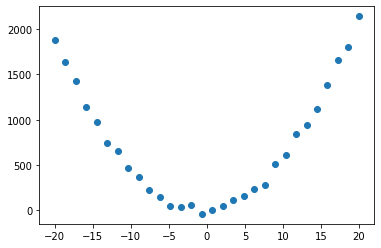

In [9]:
"""
Par exemple si on ajoute une colonne a X correspondant a x² en plus de la colonne de 1 et qu'on calcule 
un w = [a,b,c], Xw donne ax² + bx + 1 donc c'est un genre de régression quadratique.
Et ça permet d'apprendre une forme de parabole
"""
x = np.linspace(-20,20,30).reshape((-1,1))
y = 5 * x**2 + 6*x + 3 + np.random.normal(0,30,x.shape)
y = y.reshape((-1,1))
plt.scatter(x,y)

Donc le modèle qu'on trouve est :  [[5.02591823 6.49029694 4.82011902]]


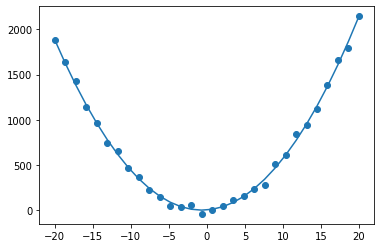

In [10]:

def adapt_quad(X):
    return np.hstack((X**2,X,np.ones((X.shape[0],1))))  

w = np.dot(np.linalg.pinv(adapt_quad(x).T.dot(adapt_quad(x))),adapt_quad(x).T.dot(y))
print("Donc le modèle qu'on trouve est : ",w.T)
plt.scatter(x,y)
#Calcul des prédictions
ypred = predictions(w.T,adapt_quad(x))
#Tracage du modèle : 
plt.plot(x,ypred)
plt.show()

Donc le modèle qu'on trouve est :  [[-1.86960982e-17 -6.94366691e-02  1.08364380e-16]]


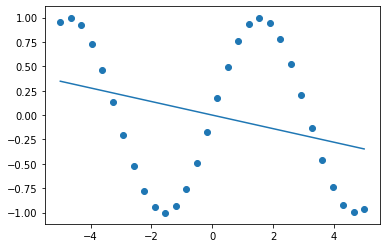

In [12]:
x = np.linspace(-5,+5,30).reshape((-1,1))
y = np.sin(x) 
y = y.reshape((-1,1))

def adapt_quad(X):
    return np.hstack((X**2,X,np.ones((X.shape[0],1))))  

w = np.dot(np.linalg.pinv(adapt_quad(x).T.dot(adapt_quad(x))),adapt_quad(x).T.dot(y))
print("Donc le modèle qu'on trouve est : ",w.T)
plt.scatter(x,y)
#Calcul des prédictions
ypred = predictions(w.T,adapt_quad(x))
#Tracage du modèle : 
plt.plot(x,ypred)
plt.show()

Donc le modèle qu'on trouve est :  [[-2.82295852e-02 -1.14725122e-17  3.82538795e-01  3.61347564e-17]]


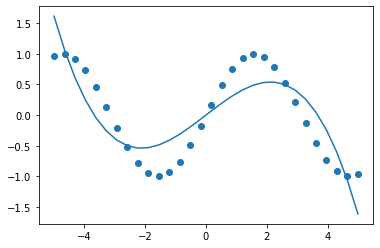

In [13]:
x = np.linspace(-5,+5,30).reshape((-1,1))
y = np.sin(x) 
y = y.reshape((-1,1))

def adapt_quad(X):
    return np.hstack((X**3,X**2,X,np.ones((X.shape[0],1))))  

w = np.dot(np.linalg.pinv(adapt_quad(x).T.dot(adapt_quad(x))),adapt_quad(x).T.dot(y))
print("Donc le modèle qu'on trouve est : ",w.T)
plt.scatter(x,y)
#Calcul des prédictions
ypred = predictions(w.T,adapt_quad(x))
#Tracage du modèle : 
plt.plot(x,ypred)
plt.show()

Donc le modèle qu'on trouve est :  [[ 2.78619625e-03 -2.60480423e-15 -1.10409307e-01  6.25689005e-14
   8.49292110e-01 -1.84685268e-13]]


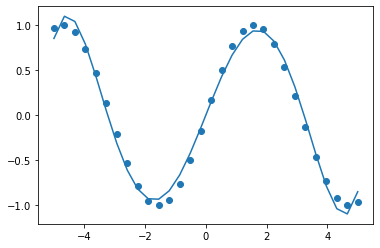

In [14]:
x = np.linspace(-5,+5,30).reshape((-1,1))
y = np.sin(x) 
y = y.reshape((-1,1))

def adapt_quad(X):
    return np.hstack((X**5,X**4,X**3,X**2,X,np.ones((X.shape[0],1))))  

w = np.dot(np.linalg.pinv(adapt_quad(x).T.dot(adapt_quad(x))),adapt_quad(x).T.dot(y))
print("Donc le modèle qu'on trouve est : ",w.T)
plt.scatter(x,y)
#Calcul des prédictions
ypred = predictions(w.T,adapt_quad(x))
#Tracage du modèle : 
plt.plot(x,ypred)
plt.show()

Donc le modèle qu'on trouve est :  [[-3.53443906e-06 -1.26928022e-15  5.44584490e-04  1.87260066e-13
  -2.19017309e-02 -6.85127065e-12  1.89112467e-01  3.71933139e-11]]


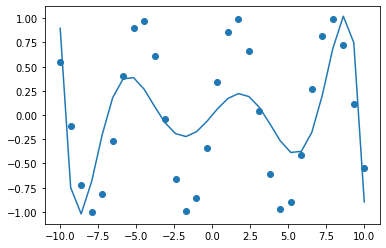

In [15]:
x = np.linspace(-10,+10,30).reshape((-1,1))
y = np.sin(x) 
y = y.reshape((-1,1))

def adapt_quad(X):
    return np.hstack((X**7,X**6,X**5,X**4,X**3,X**2,X,np.ones((X.shape[0],1))))  

w = np.dot(np.linalg.pinv(adapt_quad(x).T.dot(adapt_quad(x))),adapt_quad(x).T.dot(y))
print("Donc le modèle qu'on trouve est : ",w.T)
plt.scatter(x,y)
#Calcul des prédictions
ypred = predictions(w.T,adapt_quad(x))
#Tracage du modèle : 
plt.plot(x,ypred)
plt.show()

Donc le modèle qu'on trouve est :  [[ 5.07492807e-12  9.38209925e-22 -1.01727694e-09 -1.41595021e-19
   5.03905932e-08  4.87686163e-18  2.01309561e-09  2.03130788e-19
   5.53990461e-11  5.86894874e-21  1.32441883e-12  1.47948956e-22
   3.00882730e-14  3.61744942e-24]]


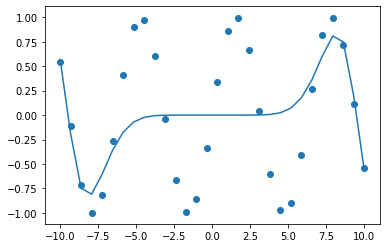

In [16]:
x = np.linspace(-10,+10,30).reshape((-1,1))
y = np.sin(x) 
y = y.reshape((-1,1))

def adapt_quad(X):
    return np.hstack((X**13,X**12,X**11,X**10,X**9,X**8,X**7,X**6,X**5,X**4,X**3,X**2,X,np.ones((X.shape[0],1))))  

w = np.dot(np.linalg.pinv(adapt_quad(x).T.dot(adapt_quad(x))),adapt_quad(x).T.dot(y))
print("Donc le modèle qu'on trouve est : ",w.T)
plt.scatter(x,y)
#Calcul des prédictions
ypred = predictions(w.T,adapt_quad(x))
#Tracage du modèle : 
plt.plot(x,ypred)
plt.show()

Comme vous le voyez on peut apprendre mais les capacités de généralisations sont toujours trés limités, ici la solution évidente une fois qu'on constate que c'est un sinus est d'utiliser simplement la réciproque c'est a dire $sin^{-1}$ afin de repasser au cas linéaire

Epoch 1/100
1000/1000 [==============================] - 0s 111us/step - loss: 331929.3020
Epoch 2/100
1000/1000 [==============================] - 0s 22us/step - loss: 325609.0818
Epoch 3/100
1000/1000 [==============================] - 0s 23us/step - loss: 318034.6833
Epoch 4/100
1000/1000 [==============================] - 0s 20us/step - loss: 308866.3067
Epoch 5/100
1000/1000 [==============================] - 0s 20us/step - loss: 297992.8285
Epoch 6/100
1000/1000 [==============================] - 0s 19us/step - loss: 284996.1160
Epoch 7/100
1000/1000 [==============================] - 0s 24us/step - loss: 269503.3745
Epoch 8/100
1000/1000 [==============================] - 0s 21us/step - loss: 251484.5380
Epoch 9/100
1000/1000 [==============================] - 0s 19us/step - loss: 231308.1493
Epoch 10/100
1000/1000 [==============================] - 0s 20us/step - loss: 209067.7810
Epoch 11/100
1000/1000 [==============================] - 0s 28us/step - loss: 185446.4268
Epoch 1

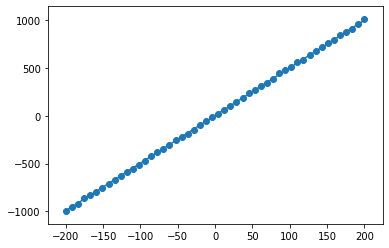

# Démystifier les Réseaux de Neurones

### Un Perceptron 
Enfaite un perceptron c'est juste une regression linéaire qui en sortie passe par une fonction d'activation,
En l'occurrent si la fonction d'activation est la fonction identité, c'est exactement une regression linéaire.
Ce qu'il faut comprendre c'est que chaque neurone dispose d'une matrice de pondérations pour les synapses en entrée 
![40% center](nn1.png)

Avant de commencer a expérimenter, on importe un dataset, on en profite également pour importer une fonction de
coûts implémentée par Scikit-Learn qui calcule les moindres carrés , ~~la flemme de la coder~~ les détails de son
implémentation sont laissés en exercice au lecteur

In [22]:

X, y = load_boston(return_X_y=True)
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [23]:
"""
Donc pour rappel un réseau de neurones se compose de : 
    - Une matrice de poids pour les synapses en entrée 
    - Une matrice de biais
    - Une fonction d'activation qui détermine la sortie en fonction d'une combinaison linéaire de l'entrée.
Calculer la sortie d'un neurone (ou d'un réseau de neurones) se fait en utilisant l'algorithme de feed forward. 
"""

weights = np.zeros((13,1)) #On met les weights a zéro par exemple.
biais = np.zeros(1)

sigm = lambda x:1/(1 + np.exp(-x))
identity = lambda x:x

def feed_forward(x,*neurone):
    w,biais,activation_func = neurone
    y = np.dot(x,w) + biais
    y = activation_func(y)
    return y

In [25]:
"""
Imaginons que la par exemple on entraine nos pondérations par résolution directe des moindres carrés
"""
weights = np.dot(np.linalg.pinv(adapt(X).T.dot(adapt(X))),adapt(X).T.dot(y))
print("Weights = ",weights)
"""
A ce moment la la prédiction vas normalement être plus précise
Remarque : si vous comptez vous remarquerez qu'il y'a 14 weights et qu'il devrait y'en avoir 13 je vous laisse
refléchir a pourquoi. 
"""

"""
Réponse : 
"""
weights , biais = weights[:-1],weights[-1]
"""
Affichage du résultat
"""
print("prediction : ",feed_forward(X[0],weights,biais,identity), " la vraie valeur est : ", y[0])
print("Erreurs globales : ", mean_squared_error(feed_forward(X,weights,biais,identity),y))

Weights =  [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01  3.64594884e+01]
prediction :  30.00384337701893  la vraie valeur est :  24.0
Erreurs globales :  21.894831181729202


### Keras : Un exemple de librairies pour les réseaux de neurones 
Ici je vous présente Keras une librairie utilisée pour manipuler les réseaux de neurones multi-couches

Epoch 1/100
1000/1000 [==============================] - 0s 69us/step - loss: 282123.6441
Epoch 2/100
1000/1000 [==============================] - 0s 20us/step - loss: 260367.4903
Epoch 3/100
1000/1000 [==============================] - 0s 21us/step - loss: 237709.3291
Epoch 4/100
1000/1000 [==============================] - 0s 20us/step - loss: 213767.9670
Epoch 5/100
1000/1000 [==============================] - 0s 19us/step - loss: 187949.0166
Epoch 6/100
1000/1000 [==============================] - 0s 18us/step - loss: 161563.8727
Epoch 7/100
1000/1000 [==============================] - 0s 19us/step - loss: 134365.3328
Epoch 8/100
1000/1000 [==============================] - 0s 20us/step - loss: 108045.7263
Epoch 9/100
1000/1000 [==============================] - 0s 18us/step - loss: 82723.8770
Epoch 10/100
1000/1000 [==============================] - 0s 20us/step - loss: 58934.9247
Epoch 11/100
1000/1000 [==============================] - 0s 18us/step - loss: 37864.3938
Epoch 12/10

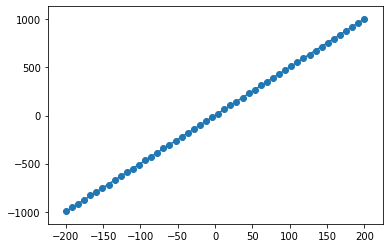

In [46]:
"""
Cette classe contient une représentation plus complète d'un réseau de neurones multicouches.
"""
from keras.models import Sequential
from keras.layers import Dense, Activation

x = np.linspace(-200,200,1000).reshape((-1,1))
y = 5 * x + 3 + np.random.normal(0,5,x.shape)

model = Sequential([
    Dense(1, input_shape=(1,)),
    Activation('linear'),
    Dense(10,),
    Activation('linear'),
    Dense(1,),
    Activation('linear'),
])
model.compile(optimizer='rmsprop',
              loss='mse')
# Train the model, iterating on the data in batches of 32 samples
model.fit(x, y, epochs=100, batch_size=32)
#Calcul des prédictions
y_pred = model.predict(x)
#Tracage du modèle : 
plt.plot(x,y_pred)

x = np.linspace(-200,200,50).reshape((-1,1))
y = 5 * x + 3 + np.random.normal(0,5,x.shape)
plt.scatter(x,y)
plt.show()

On va tester ça sur l'exemple de tout a l'heure a présent : 

In [54]:
X, y = load_boston(return_X_y=True)
model = Sequential([
    Dense(1, input_shape=(13,)),
    Activation('linear'),
])
model.compile(optimizer='rmsprop',
              loss='mse')
model.fit(X, y, epochs=10000, batch_size=100)

Epoch 1/10000
506/506 [==============================] - 0s 63us/step - loss: 89034.4923
Epoch 2/10000
506/506 [==============================] - 0s 9us/step - loss: 83929.6575
Epoch 3/10000
506/506 [==============================] - 0s 17us/step - loss: 80088.7088
Epoch 4/10000
506/506 [==============================] - 0s 12us/step - loss: 76724.3080
Epoch 5/10000
506/506 [==============================] - 0s 12us/step - loss: 73645.6024
Epoch 6/10000
506/506 [==============================] - 0s 14us/step - loss: 70691.5031
Epoch 7/10000
506/506 [==============================] - 0s 15us/step - loss: 67817.8912
Epoch 8/10000
506/506 [==============================] - 0s 10us/step - loss: 64975.3861
Epoch 9/10000
506/506 [==============================] - 0s 11us/step - loss: 62311.9841
Epoch 10/10000
506/506 [==============================] - 0s 15us/step - loss: 59693.2863
Epoch 11/10000
506/506 [==============================] - 0s 16us/step - loss: 57122.2812
Epoch 12/10000
506/5

506/506 [==============================] - 0s 11us/step - loss: 57.8691
Epoch 187/10000
506/506 [==============================] - 0s 10us/step - loss: 57.4076
Epoch 188/10000
506/506 [==============================] - 0s 11us/step - loss: 57.4569
Epoch 189/10000
506/506 [==============================] - 0s 14us/step - loss: 57.2029
Epoch 190/10000
506/506 [==============================] - 0s 12us/step - loss: 57.4932
Epoch 191/10000
506/506 [==============================] - 0s 10us/step - loss: 56.5401
Epoch 192/10000
506/506 [==============================] - 0s 11us/step - loss: 56.3011
Epoch 193/10000
506/506 [==============================] - 0s 8us/step - loss: 57.3569
Epoch 194/10000
506/506 [==============================] - 0s 11us/step - loss: 56.2222
Epoch 195/10000
506/506 [==============================] - 0s 11us/step - loss: 56.7736
Epoch 196/10000
506/506 [==============================] - 0s 11us/step - loss: 56.1635
Epoch 197/10000
506/506 [========================

506/506 [==============================] - 0s 11us/step - loss: 44.4175
Epoch 373/10000
506/506 [==============================] - 0s 10us/step - loss: 44.3515
Epoch 374/10000
506/506 [==============================] - 0s 12us/step - loss: 45.0028
Epoch 375/10000
506/506 [==============================] - 0s 10us/step - loss: 47.0023
Epoch 376/10000
506/506 [==============================] - 0s 11us/step - loss: 44.0033
Epoch 377/10000
506/506 [==============================] - 0s 9us/step - loss: 44.0121
Epoch 378/10000
506/506 [==============================] - 0s 11us/step - loss: 44.6224
Epoch 379/10000
506/506 [==============================] - 0s 11us/step - loss: 45.3553
Epoch 380/10000
506/506 [==============================] - 0s 11us/step - loss: 43.7449
Epoch 381/10000
506/506 [==============================] - 0s 9us/step - loss: 44.1343
Epoch 382/10000
506/506 [==============================] - 0s 13us/step - loss: 43.7246
Epoch 383/10000
506/506 [=========================

506/506 [==============================] - 0s 10us/step - loss: 39.4558
Epoch 559/10000
506/506 [==============================] - 0s 11us/step - loss: 39.3581
Epoch 560/10000
506/506 [==============================] - 0s 12us/step - loss: 39.7513
Epoch 561/10000
506/506 [==============================] - 0s 8us/step - loss: 40.2429
Epoch 562/10000
506/506 [==============================] - 0s 17us/step - loss: 40.0041
Epoch 563/10000
506/506 [==============================] - 0s 13us/step - loss: 39.2809
Epoch 564/10000
506/506 [==============================] - 0s 12us/step - loss: 39.1569
Epoch 565/10000
506/506 [==============================] - 0s 10us/step - loss: 39.0898
Epoch 566/10000
506/506 [==============================] - 0s 10us/step - loss: 39.6821
Epoch 567/10000
506/506 [==============================] - 0s 11us/step - loss: 39.0535
Epoch 568/10000
506/506 [==============================] - 0s 9us/step - loss: 39.6480
Epoch 569/10000
506/506 [=========================

506/506 [==============================] - 0s 10us/step - loss: 37.0133
Epoch 745/10000
506/506 [==============================] - 0s 10us/step - loss: 36.5899
Epoch 746/10000
506/506 [==============================] - 0s 10us/step - loss: 36.2656
Epoch 747/10000
506/506 [==============================] - 0s 13us/step - loss: 37.2828
Epoch 748/10000
506/506 [==============================] - 0s 10us/step - loss: 36.2119
Epoch 749/10000
506/506 [==============================] - 0s 10us/step - loss: 36.2292
Epoch 750/10000
506/506 [==============================] - 0s 10us/step - loss: 36.0722
Epoch 751/10000
506/506 [==============================] - 0s 12us/step - loss: 36.3307
Epoch 752/10000
506/506 [==============================] - 0s 9us/step - loss: 36.8084
Epoch 753/10000
506/506 [==============================] - 0s 9us/step - loss: 36.7195
Epoch 754/10000
506/506 [==============================] - 0s 9us/step - loss: 36.5225
Epoch 755/10000
506/506 [==========================

506/506 [==============================] - 0s 11us/step - loss: 35.3796
Epoch 931/10000
506/506 [==============================] - 0s 10us/step - loss: 34.6411
Epoch 932/10000
506/506 [==============================] - 0s 12us/step - loss: 34.0613
Epoch 933/10000
506/506 [==============================] - 0s 9us/step - loss: 34.2222
Epoch 934/10000
506/506 [==============================] - 0s 11us/step - loss: 34.9122
Epoch 935/10000
506/506 [==============================] - 0s 11us/step - loss: 33.9479
Epoch 936/10000
506/506 [==============================] - 0s 14us/step - loss: 34.4505
Epoch 937/10000
506/506 [==============================] - 0s 10us/step - loss: 34.3253
Epoch 938/10000
506/506 [==============================] - 0s 11us/step - loss: 34.1805
Epoch 939/10000
506/506 [==============================] - 0s 12us/step - loss: 34.1145
Epoch 940/10000
506/506 [==============================] - 0s 12us/step - loss: 35.8490
Epoch 941/10000
506/506 [========================

506/506 [==============================] - 0s 9us/step - loss: 32.2709
Epoch 1115/10000
506/506 [==============================] - 0s 12us/step - loss: 32.4230
Epoch 1116/10000
506/506 [==============================] - 0s 9us/step - loss: 33.7148
Epoch 1117/10000
506/506 [==============================] - 0s 10us/step - loss: 32.3773
Epoch 1118/10000
506/506 [==============================] - 0s 9us/step - loss: 32.3317
Epoch 1119/10000
506/506 [==============================] - 0s 12us/step - loss: 32.7621
Epoch 1120/10000
506/506 [==============================] - 0s 9us/step - loss: 33.7083
Epoch 1121/10000
506/506 [==============================] - 0s 12us/step - loss: 32.8389
Epoch 1122/10000
506/506 [==============================] - 0s 13us/step - loss: 32.2876
Epoch 1123/10000
506/506 [==============================] - 0s 10us/step - loss: 33.9407
Epoch 1124/10000
506/506 [==============================] - 0s 11us/step - loss: 32.3161
Epoch 1125/10000
506/506 [================

506/506 [==============================] - 0s 13us/step - loss: 30.9645
Epoch 1299/10000
506/506 [==============================] - 0s 14us/step - loss: 31.6441
Epoch 1300/10000
506/506 [==============================] - 0s 11us/step - loss: 31.4559
Epoch 1301/10000
506/506 [==============================] - 0s 12us/step - loss: 30.8555
Epoch 1302/10000
506/506 [==============================] - 0s 12us/step - loss: 31.2997
Epoch 1303/10000
506/506 [==============================] - 0s 11us/step - loss: 32.2856
Epoch 1304/10000
506/506 [==============================] - 0s 10us/step - loss: 31.3821
Epoch 1305/10000
506/506 [==============================] - 0s 10us/step - loss: 31.8755
Epoch 1306/10000
506/506 [==============================] - 0s 12us/step - loss: 30.9094
Epoch 1307/10000
506/506 [==============================] - 0s 10us/step - loss: 31.2774
Epoch 1308/10000
506/506 [==============================] - 0s 9us/step - loss: 31.7476
Epoch 1309/10000
506/506 [=============

506/506 [==============================] - 0s 13us/step - loss: 30.2972
Epoch 1483/10000
506/506 [==============================] - 0s 9us/step - loss: 30.4392
Epoch 1484/10000
506/506 [==============================] - 0s 11us/step - loss: 30.1790
Epoch 1485/10000
506/506 [==============================] - 0s 13us/step - loss: 30.4219
Epoch 1486/10000
506/506 [==============================] - 0s 11us/step - loss: 30.1829
Epoch 1487/10000
506/506 [==============================] - 0s 9us/step - loss: 30.5811
Epoch 1488/10000
506/506 [==============================] - 0s 12us/step - loss: 30.0038
Epoch 1489/10000
506/506 [==============================] - 0s 12us/step - loss: 29.9338
Epoch 1490/10000
506/506 [==============================] - 0s 10us/step - loss: 31.0366
Epoch 1491/10000
506/506 [==============================] - 0s 8us/step - loss: 30.0427
Epoch 1492/10000
506/506 [==============================] - 0s 15us/step - loss: 29.6294
Epoch 1493/10000
506/506 [===============

506/506 [==============================] - 0s 8us/step - loss: 29.5028
Epoch 1667/10000
506/506 [==============================] - 0s 10us/step - loss: 28.8829
Epoch 1668/10000
506/506 [==============================] - 0s 11us/step - loss: 29.7018
Epoch 1669/10000
506/506 [==============================] - 0s 8us/step - loss: 30.5996
Epoch 1670/10000
506/506 [==============================] - 0s 12us/step - loss: 29.3552
Epoch 1671/10000
506/506 [==============================] - 0s 9us/step - loss: 29.1029
Epoch 1672/10000
506/506 [==============================] - 0s 10us/step - loss: 29.4814
Epoch 1673/10000
506/506 [==============================] - 0s 11us/step - loss: 29.4199
Epoch 1674/10000
506/506 [==============================] - 0s 8us/step - loss: 29.2587
Epoch 1675/10000
506/506 [==============================] - 0s 9us/step - loss: 29.2427
Epoch 1676/10000
506/506 [==============================] - 0s 9us/step - loss: 29.0624
Epoch 1677/10000
506/506 [==================

506/506 [==============================] - 0s 11us/step - loss: 30.5948
Epoch 1851/10000
506/506 [==============================] - 0s 12us/step - loss: 28.0542
Epoch 1852/10000
506/506 [==============================] - 0s 10us/step - loss: 28.1300
Epoch 1853/10000
506/506 [==============================] - 0s 9us/step - loss: 27.9929
Epoch 1854/10000
506/506 [==============================] - 0s 11us/step - loss: 28.2729
Epoch 1855/10000
506/506 [==============================] - 0s 14us/step - loss: 29.5089
Epoch 1856/10000
506/506 [==============================] - 0s 9us/step - loss: 28.4880
Epoch 1857/10000
506/506 [==============================] - 0s 12us/step - loss: 28.4172
Epoch 1858/10000
506/506 [==============================] - 0s 11us/step - loss: 28.1202
Epoch 1859/10000
506/506 [==============================] - 0s 12us/step - loss: 28.7779
Epoch 1860/10000
506/506 [==============================] - 0s 10us/step - loss: 28.2004
Epoch 1861/10000
506/506 [==============

506/506 [==============================] - 0s 14us/step - loss: 27.3040
Epoch 2035/10000
506/506 [==============================] - 0s 10us/step - loss: 27.3713
Epoch 2036/10000
506/506 [==============================] - 0s 10us/step - loss: 28.9233
Epoch 2037/10000
506/506 [==============================] - 0s 10us/step - loss: 27.3685
Epoch 2038/10000
506/506 [==============================] - 0s 10us/step - loss: 27.4025
Epoch 2039/10000
506/506 [==============================] - 0s 9us/step - loss: 28.1182
Epoch 2040/10000
506/506 [==============================] - 0s 9us/step - loss: 27.3451
Epoch 2041/10000
506/506 [==============================] - 0s 9us/step - loss: 27.4048
Epoch 2042/10000
506/506 [==============================] - 0s 8us/step - loss: 27.7832
Epoch 2043/10000
506/506 [==============================] - 0s 10us/step - loss: 27.4093
Epoch 2044/10000
506/506 [==============================] - 0s 8us/step - loss: 27.7521
Epoch 2045/10000
506/506 [=================

506/506 [==============================] - 0s 10us/step - loss: 27.3857
Epoch 2219/10000
506/506 [==============================] - 0s 7us/step - loss: 27.4517
Epoch 2220/10000
506/506 [==============================] - 0s 9us/step - loss: 27.0810
Epoch 2221/10000
506/506 [==============================] - 0s 9us/step - loss: 27.3327
Epoch 2222/10000
506/506 [==============================] - 0s 10us/step - loss: 27.1832
Epoch 2223/10000
506/506 [==============================] - 0s 7us/step - loss: 27.0055
Epoch 2224/10000
506/506 [==============================] - 0s 10us/step - loss: 28.3780
Epoch 2225/10000
506/506 [==============================] - 0s 8us/step - loss: 27.2515
Epoch 2226/10000
506/506 [==============================] - 0s 9us/step - loss: 27.1114
Epoch 2227/10000
506/506 [==============================] - 0s 7us/step - loss: 26.8018
Epoch 2228/10000
506/506 [==============================] - 0s 9us/step - loss: 29.6118
Epoch 2229/10000
506/506 [====================

506/506 [==============================] - 0s 10us/step - loss: 26.8973
Epoch 2403/10000
506/506 [==============================] - 0s 9us/step - loss: 26.6045
Epoch 2404/10000
506/506 [==============================] - 0s 10us/step - loss: 26.5501
Epoch 2405/10000
506/506 [==============================] - 0s 10us/step - loss: 27.6344
Epoch 2406/10000
506/506 [==============================] - 0s 9us/step - loss: 28.3637
Epoch 2407/10000
506/506 [==============================] - 0s 9us/step - loss: 26.7084
Epoch 2408/10000
506/506 [==============================] - 0s 9us/step - loss: 26.5400
Epoch 2409/10000
506/506 [==============================] - 0s 10us/step - loss: 26.4058
Epoch 2410/10000
506/506 [==============================] - 0s 10us/step - loss: 26.3661
Epoch 2411/10000
506/506 [==============================] - 0s 8us/step - loss: 26.8136
Epoch 2412/10000
506/506 [==============================] - 0s 9us/step - loss: 27.1174
Epoch 2413/10000
506/506 [==================

506/506 [==============================] - 0s 10us/step - loss: 26.1939
Epoch 2587/10000
506/506 [==============================] - 0s 8us/step - loss: 27.2136
Epoch 2588/10000
506/506 [==============================] - 0s 11us/step - loss: 25.9286
Epoch 2589/10000
506/506 [==============================] - 0s 10us/step - loss: 26.2579
Epoch 2590/10000
506/506 [==============================] - 0s 8us/step - loss: 26.8450
Epoch 2591/10000
506/506 [==============================] - 0s 8us/step - loss: 28.0285
Epoch 2592/10000
506/506 [==============================] - 0s 10us/step - loss: 26.0619
Epoch 2593/10000
506/506 [==============================] - 0s 8us/step - loss: 25.9735
Epoch 2594/10000
506/506 [==============================] - 0s 9us/step - loss: 26.1868
Epoch 2595/10000
506/506 [==============================] - 0s 7us/step - loss: 26.9241
Epoch 2596/10000
506/506 [==============================] - 0s 10us/step - loss: 26.3001
Epoch 2597/10000
506/506 [==================

506/506 [==============================] - 0s 8us/step - loss: 25.9894
Epoch 2771/10000
506/506 [==============================] - 0s 12us/step - loss: 26.6144
Epoch 2772/10000
506/506 [==============================] - 0s 11us/step - loss: 25.8056
Epoch 2773/10000
506/506 [==============================] - 0s 8us/step - loss: 26.2748
Epoch 2774/10000
506/506 [==============================] - 0s 11us/step - loss: 25.8530
Epoch 2775/10000
506/506 [==============================] - 0s 11us/step - loss: 25.9693
Epoch 2776/10000
506/506 [==============================] - 0s 11us/step - loss: 26.3393
Epoch 2777/10000
506/506 [==============================] - 0s 11us/step - loss: 26.4155
Epoch 2778/10000
506/506 [==============================] - 0s 9us/step - loss: 26.1865
Epoch 2779/10000
506/506 [==============================] - 0s 9us/step - loss: 25.8041
Epoch 2780/10000
506/506 [==============================] - 0s 9us/step - loss: 25.9422
Epoch 2781/10000
506/506 [=================

Epoch 2955/10000
506/506 [==============================] - 0s 10us/step - loss: 25.9726
Epoch 2956/10000
506/506 [==============================] - 0s 11us/step - loss: 25.9950
Epoch 2957/10000
506/506 [==============================] - 0s 9us/step - loss: 25.3718
Epoch 2958/10000
506/506 [==============================] - 0s 8us/step - loss: 25.6513
Epoch 2959/10000
506/506 [==============================] - 0s 8us/step - loss: 26.0904
Epoch 2960/10000
506/506 [==============================] - 0s 14us/step - loss: 25.4333
Epoch 2961/10000
506/506 [==============================] - 0s 14us/step - loss: 26.7495
Epoch 2962/10000
506/506 [==============================] - 0s 9us/step - loss: 25.7714
Epoch 2963/10000
506/506 [==============================] - 0s 9us/step - loss: 25.4580
Epoch 2964/10000
506/506 [==============================] - 0s 7us/step - loss: 26.0438
Epoch 2965/10000
506/506 [==============================] - 0s 10us/step - loss: 25.5116
Epoch 2966/10000
506/506 [=

Epoch 3140/10000
506/506 [==============================] - 0s 7us/step - loss: 25.6460
Epoch 3141/10000
506/506 [==============================] - 0s 8us/step - loss: 25.8886
Epoch 3142/10000
506/506 [==============================] - 0s 8us/step - loss: 25.4054
Epoch 3143/10000
506/506 [==============================] - 0s 10us/step - loss: 25.3134
Epoch 3144/10000
506/506 [==============================] - 0s 10us/step - loss: 25.2705
Epoch 3145/10000
506/506 [==============================] - 0s 10us/step - loss: 25.6791
Epoch 3146/10000
506/506 [==============================] - 0s 7us/step - loss: 25.4920
Epoch 3147/10000
506/506 [==============================] - 0s 10us/step - loss: 25.3636
Epoch 3148/10000
506/506 [==============================] - 0s 10us/step - loss: 26.8303
Epoch 3149/10000
506/506 [==============================] - 0s 9us/step - loss: 25.2106
Epoch 3150/10000
506/506 [==============================] - 0s 9us/step - loss: 25.3933
Epoch 3151/10000
506/506 [=

506/506 [==============================] - 0s 10us/step - loss: 25.0897
Epoch 3326/10000
506/506 [==============================] - 0s 10us/step - loss: 25.1959
Epoch 3327/10000
506/506 [==============================] - 0s 9us/step - loss: 25.5621
Epoch 3328/10000
506/506 [==============================] - 0s 10us/step - loss: 25.1209
Epoch 3329/10000
506/506 [==============================] - 0s 9us/step - loss: 25.0386
Epoch 3330/10000
506/506 [==============================] - 0s 8us/step - loss: 25.1899
Epoch 3331/10000
506/506 [==============================] - 0s 8us/step - loss: 25.4348
Epoch 3332/10000
506/506 [==============================] - 0s 9us/step - loss: 26.0143
Epoch 3333/10000
506/506 [==============================] - 0s 9us/step - loss: 26.1582
Epoch 3334/10000
506/506 [==============================] - 0s 8us/step - loss: 25.0237
Epoch 3335/10000
506/506 [==============================] - 0s 8us/step - loss: 26.9724
Epoch 3336/10000
506/506 [====================

Epoch 3418/10000
506/506 [==============================] - 0s 9us/step - loss: 24.8397
Epoch 3419/10000
506/506 [==============================] - 0s 9us/step - loss: 25.1242
Epoch 3420/10000
506/506 [==============================] - 0s 10us/step - loss: 25.0907
Epoch 3421/10000
506/506 [==============================] - 0s 10us/step - loss: 25.9766
Epoch 3422/10000
506/506 [==============================] - 0s 11us/step - loss: 24.9557
Epoch 3423/10000
506/506 [==============================] - 0s 10us/step - loss: 24.9329
Epoch 3424/10000
506/506 [==============================] - 0s 11us/step - loss: 25.3448
Epoch 3425/10000
506/506 [==============================] - 0s 10us/step - loss: 25.4373
Epoch 3426/10000
506/506 [==============================] - 0s 11us/step - loss: 25.6119
Epoch 3427/10000
506/506 [==============================] - 0s 10us/step - loss: 25.0395
Epoch 3428/10000
506/506 [==============================] - 0s 10us/step - loss: 25.0516
Epoch 3429/10000
506/50

Epoch 3603/10000
506/506 [==============================] - 0s 10us/step - loss: 25.0271
Epoch 3604/10000
506/506 [==============================] - 0s 8us/step - loss: 25.7014
Epoch 3605/10000
506/506 [==============================] - 0s 9us/step - loss: 26.5662
Epoch 3606/10000
506/506 [==============================] - 0s 8us/step - loss: 25.4298
Epoch 3607/10000
506/506 [==============================] - 0s 9us/step - loss: 24.7452
Epoch 3608/10000
506/506 [==============================] - 0s 8us/step - loss: 24.9359
Epoch 3609/10000
506/506 [==============================] - 0s 10us/step - loss: 25.1014
Epoch 3610/10000
506/506 [==============================] - 0s 9us/step - loss: 26.6280
Epoch 3611/10000
506/506 [==============================] - 0s 10us/step - loss: 24.7391
Epoch 3612/10000
506/506 [==============================] - 0s 8us/step - loss: 24.7716
Epoch 3613/10000
506/506 [==============================] - 0s 11us/step - loss: 25.6463
Epoch 3614/10000
506/506 [==

506/506 [==============================] - 0s 9us/step - loss: 25.0249
Epoch 3788/10000
506/506 [==============================] - 0s 9us/step - loss: 24.8487
Epoch 3789/10000
506/506 [==============================] - 0s 9us/step - loss: 24.7782
Epoch 3790/10000
506/506 [==============================] - 0s 8us/step - loss: 24.9595
Epoch 3791/10000
506/506 [==============================] - 0s 9us/step - loss: 26.0277
Epoch 3792/10000
506/506 [==============================] - 0s 9us/step - loss: 24.8751
Epoch 3793/10000
506/506 [==============================] - 0s 10us/step - loss: 26.3872
Epoch 3794/10000
506/506 [==============================] - 0s 10us/step - loss: 25.8299
Epoch 3795/10000
506/506 [==============================] - 0s 9us/step - loss: 24.8331
Epoch 3796/10000
506/506 [==============================] - 0s 8us/step - loss: 26.3081
Epoch 3797/10000
506/506 [==============================] - 0s 9us/step - loss: 24.7740
Epoch 3798/10000
506/506 [=====================

Epoch 3880/10000
506/506 [==============================] - 0s 8us/step - loss: 24.8611
Epoch 3881/10000
506/506 [==============================] - 0s 9us/step - loss: 24.7785
Epoch 3882/10000
506/506 [==============================] - 0s 10us/step - loss: 24.8602
Epoch 3883/10000
506/506 [==============================] - 0s 9us/step - loss: 24.9624
Epoch 3884/10000
506/506 [==============================] - 0s 10us/step - loss: 24.8481
Epoch 3885/10000
506/506 [==============================] - 0s 9us/step - loss: 25.8183
Epoch 3886/10000
506/506 [==============================] - 0s 9us/step - loss: 26.1170
Epoch 3887/10000
506/506 [==============================] - 0s 9us/step - loss: 25.1675
Epoch 3888/10000
506/506 [==============================] - 0s 9us/step - loss: 24.6108
Epoch 3889/10000
506/506 [==============================] - 0s 9us/step - loss: 25.2888
Epoch 3890/10000
506/506 [==============================] - 0s 9us/step - loss: 24.9948
Epoch 3891/10000
506/506 [====

506/506 [==============================] - 0s 9us/step - loss: 24.6347
Epoch 4065/10000
506/506 [==============================] - 0s 10us/step - loss: 24.9117
Epoch 4066/10000
506/506 [==============================] - 0s 9us/step - loss: 25.0548
Epoch 4067/10000
506/506 [==============================] - 0s 9us/step - loss: 25.3981
Epoch 4068/10000
506/506 [==============================] - 0s 8us/step - loss: 24.7332
Epoch 4069/10000
506/506 [==============================] - 0s 11us/step - loss: 24.7471
Epoch 4070/10000
506/506 [==============================] - 0s 10us/step - loss: 25.9449
Epoch 4071/10000
506/506 [==============================] - 0s 9us/step - loss: 25.1165
Epoch 4072/10000
506/506 [==============================] - 0s 9us/step - loss: 24.7729
Epoch 4073/10000
506/506 [==============================] - 0s 10us/step - loss: 26.1463
Epoch 4074/10000
506/506 [==============================] - 0s 10us/step - loss: 24.4302
Epoch 4075/10000
506/506 [==================

506/506 [==============================] - 0s 11us/step - loss: 26.9543
Epoch 4249/10000
506/506 [==============================] - 0s 9us/step - loss: 24.9412
Epoch 4250/10000
506/506 [==============================] - 0s 19us/step - loss: 24.5879
Epoch 4251/10000
506/506 [==============================] - 0s 14us/step - loss: 24.3696
Epoch 4252/10000
506/506 [==============================] - 0s 14us/step - loss: 24.7708
Epoch 4253/10000
506/506 [==============================] - 0s 13us/step - loss: 24.5578
Epoch 4254/10000
506/506 [==============================] - 0s 13us/step - loss: 24.4263
Epoch 4255/10000
506/506 [==============================] - 0s 11us/step - loss: 24.9658
Epoch 4256/10000
506/506 [==============================] - 0s 14us/step - loss: 26.4518
Epoch 4257/10000
506/506 [==============================] - 0s 12us/step - loss: 25.7546
Epoch 4258/10000
506/506 [==============================] - 0s 13us/step - loss: 24.5076
Epoch 4259/10000
506/506 [=============

506/506 [==============================] - 0s 9us/step - loss: 24.5839
Epoch 4433/10000
506/506 [==============================] - 0s 8us/step - loss: 25.4441
Epoch 4434/10000
506/506 [==============================] - 0s 8us/step - loss: 24.5266
Epoch 4435/10000
506/506 [==============================] - 0s 9us/step - loss: 24.7205
Epoch 4436/10000
506/506 [==============================] - 0s 10us/step - loss: 24.4091
Epoch 4437/10000
506/506 [==============================] - 0s 10us/step - loss: 27.1644
Epoch 4438/10000
506/506 [==============================] - 0s 13us/step - loss: 24.5699
Epoch 4439/10000
506/506 [==============================] - 0s 8us/step - loss: 24.3320
Epoch 4440/10000
506/506 [==============================] - 0s 8us/step - loss: 24.5236
Epoch 4441/10000
506/506 [==============================] - 0s 9us/step - loss: 24.8255
Epoch 4442/10000
506/506 [==============================] - 0s 8us/step - loss: 26.3247
Epoch 4443/10000
506/506 [====================

Epoch 4525/10000
506/506 [==============================] - 0s 10us/step - loss: 24.3515
Epoch 4526/10000
506/506 [==============================] - 0s 8us/step - loss: 24.6322
Epoch 4527/10000
506/506 [==============================] - 0s 8us/step - loss: 24.2124
Epoch 4528/10000
506/506 [==============================] - 0s 9us/step - loss: 24.5150
Epoch 4529/10000
506/506 [==============================] - 0s 7us/step - loss: 25.5241
Epoch 4530/10000
506/506 [==============================] - 0s 9us/step - loss: 24.2070
Epoch 4531/10000
506/506 [==============================] - 0s 7us/step - loss: 24.4868
Epoch 4532/10000
506/506 [==============================] - 0s 10us/step - loss: 25.3603
Epoch 4533/10000
506/506 [==============================] - 0s 9us/step - loss: 24.5568
Epoch 4534/10000
506/506 [==============================] - 0s 8us/step - loss: 24.3245
Epoch 4535/10000
506/506 [==============================] - 0s 10us/step - loss: 24.4650
Epoch 4536/10000
506/506 [===

506/506 [==============================] - 0s 10us/step - loss: 24.6111
Epoch 4710/10000
506/506 [==============================] - 0s 7us/step - loss: 24.9994
Epoch 4711/10000
506/506 [==============================] - 0s 9us/step - loss: 25.4771
Epoch 4712/10000
506/506 [==============================] - 0s 8us/step - loss: 25.0268
Epoch 4713/10000
506/506 [==============================] - 0s 8us/step - loss: 24.3921
Epoch 4714/10000
506/506 [==============================] - 0s 7us/step - loss: 24.7041
Epoch 4715/10000
506/506 [==============================] - 0s 9us/step - loss: 24.6141
Epoch 4716/10000
506/506 [==============================] - 0s 7us/step - loss: 24.2631
Epoch 4717/10000
506/506 [==============================] - 0s 10us/step - loss: 24.7206
Epoch 4718/10000
506/506 [==============================] - 0s 10us/step - loss: 25.4300
Epoch 4719/10000
506/506 [==============================] - 0s 9us/step - loss: 24.4134
Epoch 4720/10000
506/506 [====================

506/506 [==============================] - 0s 8us/step - loss: 24.9864
Epoch 4895/10000
506/506 [==============================] - 0s 8us/step - loss: 25.2282
Epoch 4896/10000
506/506 [==============================] - 0s 10us/step - loss: 26.2925
Epoch 4897/10000
506/506 [==============================] - 0s 9us/step - loss: 24.9841
Epoch 4898/10000
506/506 [==============================] - 0s 9us/step - loss: 24.1352
Epoch 4899/10000
506/506 [==============================] - 0s 10us/step - loss: 24.4501
Epoch 4900/10000
506/506 [==============================] - 0s 13us/step - loss: 24.6892
Epoch 4901/10000
506/506 [==============================] - 0s 9us/step - loss: 24.6287
Epoch 4902/10000
506/506 [==============================] - 0s 8us/step - loss: 24.2773
Epoch 4903/10000
506/506 [==============================] - 0s 9us/step - loss: 24.3515
Epoch 4904/10000
506/506 [==============================] - 0s 8us/step - loss: 25.3076
Epoch 4905/10000
506/506 [====================

506/506 [==============================] - 0s 10us/step - loss: 25.4943
Epoch 5079/10000
506/506 [==============================] - 0s 10us/step - loss: 24.1644
Epoch 5080/10000
506/506 [==============================] - 0s 8us/step - loss: 24.5913
Epoch 5081/10000
506/506 [==============================] - 0s 8us/step - loss: 24.3377
Epoch 5082/10000
506/506 [==============================] - 0s 11us/step - loss: 24.6016
Epoch 5083/10000
506/506 [==============================] - 0s 8us/step - loss: 25.4681
Epoch 5084/10000
506/506 [==============================] - 0s 9us/step - loss: 24.3194
Epoch 5085/10000
506/506 [==============================] - 0s 10us/step - loss: 24.2217
Epoch 5086/10000
506/506 [==============================] - 0s 8us/step - loss: 24.4415
Epoch 5087/10000
506/506 [==============================] - 0s 9us/step - loss: 24.8147
Epoch 5088/10000
506/506 [==============================] - 0s 9us/step - loss: 24.7831
Epoch 5089/10000
506/506 [===================

Epoch 5263/10000
506/506 [==============================] - 0s 10us/step - loss: 24.4519
Epoch 5264/10000
506/506 [==============================] - 0s 10us/step - loss: 24.6997
Epoch 5265/10000
506/506 [==============================] - 0s 9us/step - loss: 24.1721
Epoch 5266/10000
506/506 [==============================] - 0s 10us/step - loss: 25.0030
Epoch 5267/10000
506/506 [==============================] - 0s 10us/step - loss: 24.5349
Epoch 5268/10000
506/506 [==============================] - 0s 11us/step - loss: 24.5452
Epoch 5269/10000
506/506 [==============================] - 0s 10us/step - loss: 24.4084
Epoch 5270/10000
506/506 [==============================] - 0s 8us/step - loss: 24.4492
Epoch 5271/10000
506/506 [==============================] - 0s 8us/step - loss: 24.2949
Epoch 5272/10000
506/506 [==============================] - 0s 9us/step - loss: 24.9234
Epoch 5273/10000
506/506 [==============================] - 0s 9us/step - loss: 24.5738
Epoch 5274/10000
506/506 [

506/506 [==============================] - 0s 10us/step - loss: 24.3390
Epoch 5448/10000
506/506 [==============================] - 0s 13us/step - loss: 24.7236
Epoch 5449/10000
506/506 [==============================] - 0s 10us/step - loss: 24.9055
Epoch 5450/10000
506/506 [==============================] - 0s 11us/step - loss: 24.3237
Epoch 5451/10000
506/506 [==============================] - 0s 8us/step - loss: 24.3805
Epoch 5452/10000
506/506 [==============================] - 0s 13us/step - loss: 25.5624
Epoch 5453/10000
506/506 [==============================] - 0s 10us/step - loss: 24.7611
Epoch 5454/10000
506/506 [==============================] - 0s 10us/step - loss: 24.1203
Epoch 5455/10000
506/506 [==============================] - 0s 12us/step - loss: 24.2360
Epoch 5456/10000
506/506 [==============================] - 0s 9us/step - loss: 24.3057
Epoch 5457/10000
506/506 [==============================] - 0s 9us/step - loss: 24.2318
Epoch 5458/10000
506/506 [===============

506/506 [==============================] - 0s 13us/step - loss: 24.1410
Epoch 5632/10000
506/506 [==============================] - 0s 13us/step - loss: 24.2112
Epoch 5633/10000
506/506 [==============================] - 0s 10us/step - loss: 24.7342
Epoch 5634/10000
506/506 [==============================] - 0s 10us/step - loss: 25.2639
Epoch 5635/10000
506/506 [==============================] - 0s 9us/step - loss: 24.1760
Epoch 5636/10000
506/506 [==============================] - 0s 13us/step - loss: 25.4468
Epoch 5637/10000
506/506 [==============================] - 0s 10us/step - loss: 24.1374
Epoch 5638/10000
506/506 [==============================] - 0s 10us/step - loss: 24.2537
Epoch 5639/10000
506/506 [==============================] - 0s 11us/step - loss: 24.6356
Epoch 5640/10000
506/506 [==============================] - 0s 10us/step - loss: 24.0583
Epoch 5641/10000
506/506 [==============================] - 0s 13us/step - loss: 24.1585
Epoch 5642/10000
506/506 [=============

506/506 [==============================] - 0s 11us/step - loss: 25.5667
Epoch 5816/10000
506/506 [==============================] - 0s 10us/step - loss: 24.3480
Epoch 5817/10000
506/506 [==============================] - 0s 8us/step - loss: 24.4146
Epoch 5818/10000
506/506 [==============================] - 0s 11us/step - loss: 24.4658
Epoch 5819/10000
506/506 [==============================] - 0s 9us/step - loss: 24.7631
Epoch 5820/10000
506/506 [==============================] - 0s 8us/step - loss: 24.9585
Epoch 5821/10000
506/506 [==============================] - 0s 10us/step - loss: 24.9709
Epoch 5822/10000
506/506 [==============================] - 0s 12us/step - loss: 24.0560
Epoch 5823/10000
506/506 [==============================] - 0s 10us/step - loss: 24.8295
Epoch 5824/10000
506/506 [==============================] - 0s 9us/step - loss: 24.0868
Epoch 5825/10000
506/506 [==============================] - 0s 9us/step - loss: 24.1565
Epoch 5826/10000
506/506 [=================

506/506 [==============================] - 0s 12us/step - loss: 25.2253
Epoch 6000/10000
506/506 [==============================] - 0s 12us/step - loss: 24.0297
Epoch 6001/10000
506/506 [==============================] - 0s 9us/step - loss: 24.0326
Epoch 6002/10000
506/506 [==============================] - 0s 10us/step - loss: 24.7343
Epoch 6003/10000
506/506 [==============================] - 0s 8us/step - loss: 24.2111
Epoch 6004/10000
506/506 [==============================] - 0s 11us/step - loss: 24.3421
Epoch 6005/10000
506/506 [==============================] - 0s 9us/step - loss: 24.5672
Epoch 6006/10000
506/506 [==============================] - 0s 9us/step - loss: 24.9056
Epoch 6007/10000
506/506 [==============================] - 0s 9us/step - loss: 24.5965
Epoch 6008/10000
506/506 [==============================] - 0s 8us/step - loss: 25.2136
Epoch 6009/10000
506/506 [==============================] - 0s 11us/step - loss: 24.1980
Epoch 6010/10000
506/506 [==================

506/506 [==============================] - 0s 8us/step - loss: 24.6198
Epoch 6184/10000
506/506 [==============================] - 0s 10us/step - loss: 24.3299
Epoch 6185/10000
506/506 [==============================] - 0s 8us/step - loss: 25.9097
Epoch 6186/10000
506/506 [==============================] - 0s 11us/step - loss: 24.2212
Epoch 6187/10000
506/506 [==============================] - 0s 7us/step - loss: 24.1197
Epoch 6188/10000
506/506 [==============================] - 0s 8us/step - loss: 24.5628
Epoch 6189/10000
506/506 [==============================] - 0s 9us/step - loss: 24.2616
Epoch 6190/10000
506/506 [==============================] - 0s 11us/step - loss: 24.8956
Epoch 6191/10000
506/506 [==============================] - 0s 11us/step - loss: 24.6706
Epoch 6192/10000
506/506 [==============================] - 0s 10us/step - loss: 24.1512
Epoch 6193/10000
506/506 [==============================] - 0s 9us/step - loss: 24.2505
Epoch 6194/10000
506/506 [==================

506/506 [==============================] - 0s 9us/step - loss: 24.4872
Epoch 6368/10000
506/506 [==============================] - 0s 10us/step - loss: 24.5853
Epoch 6369/10000
506/506 [==============================] - 0s 10us/step - loss: 24.0660
Epoch 6370/10000
506/506 [==============================] - 0s 7us/step - loss: 24.9070
Epoch 6371/10000
506/506 [==============================] - 0s 11us/step - loss: 25.4667
Epoch 6372/10000
506/506 [==============================] - 0s 9us/step - loss: 23.9733
Epoch 6373/10000
506/506 [==============================] - 0s 9us/step - loss: 24.0286
Epoch 6374/10000
506/506 [==============================] - 0s 9us/step - loss: 24.7624
Epoch 6375/10000
506/506 [==============================] - 0s 9us/step - loss: 24.2740
Epoch 6376/10000
506/506 [==============================] - 0s 9us/step - loss: 25.4686
Epoch 6377/10000
506/506 [==============================] - 0s 11us/step - loss: 24.5655
Epoch 6378/10000
506/506 [===================

Epoch 6552/10000
506/506 [==============================] - 0s 8us/step - loss: 24.6156
Epoch 6553/10000
506/506 [==============================] - 0s 8us/step - loss: 24.9376
Epoch 6554/10000
506/506 [==============================] - 0s 11us/step - loss: 24.4042
Epoch 6555/10000
506/506 [==============================] - 0s 9us/step - loss: 25.3841
Epoch 6556/10000
506/506 [==============================] - 0s 10us/step - loss: 23.9689
Epoch 6557/10000
506/506 [==============================] - 0s 10us/step - loss: 24.0787
Epoch 6558/10000
506/506 [==============================] - 0s 10us/step - loss: 23.9359
Epoch 6559/10000
506/506 [==============================] - 0s 9us/step - loss: 24.1959
Epoch 6560/10000
506/506 [==============================] - 0s 9us/step - loss: 24.2346
Epoch 6561/10000
506/506 [==============================] - 0s 8us/step - loss: 24.1286
Epoch 6562/10000
506/506 [==============================] - 0s 10us/step - loss: 24.3569
Epoch 6563/10000
506/506 [=

506/506 [==============================] - 0s 23us/step - loss: 24.0620
Epoch 6737/10000
506/506 [==============================] - 0s 9us/step - loss: 24.2689
Epoch 6738/10000
506/506 [==============================] - 0s 10us/step - loss: 24.3892
Epoch 6739/10000
506/506 [==============================] - 0s 9us/step - loss: 24.7480
Epoch 6740/10000
506/506 [==============================] - 0s 11us/step - loss: 24.6952
Epoch 6741/10000
506/506 [==============================] - 0s 8us/step - loss: 24.5073
Epoch 6742/10000
506/506 [==============================] - 0s 11us/step - loss: 24.4492
Epoch 6743/10000
506/506 [==============================] - 0s 12us/step - loss: 24.3502
Epoch 6744/10000
506/506 [==============================] - 0s 8us/step - loss: 25.1485
Epoch 6745/10000
506/506 [==============================] - 0s 8us/step - loss: 24.4174
Epoch 6746/10000
506/506 [==============================] - 0s 9us/step - loss: 25.4281
Epoch 6747/10000
506/506 [==================

506/506 [==============================] - 0s 11us/step - loss: 23.9989
Epoch 6921/10000
506/506 [==============================] - 0s 9us/step - loss: 24.3613
Epoch 6922/10000
506/506 [==============================] - 0s 8us/step - loss: 24.2183
Epoch 6923/10000
506/506 [==============================] - 0s 10us/step - loss: 26.8038
Epoch 6924/10000
506/506 [==============================] - 0s 10us/step - loss: 23.9335
Epoch 6925/10000
506/506 [==============================] - 0s 12us/step - loss: 24.4163
Epoch 6926/10000
506/506 [==============================] - 0s 10us/step - loss: 23.9370
Epoch 6927/10000
506/506 [==============================] - 0s 8us/step - loss: 24.2589
Epoch 6928/10000
506/506 [==============================] - 0s 9us/step - loss: 25.4730
Epoch 6929/10000
506/506 [==============================] - 0s 10us/step - loss: 24.1928
Epoch 6930/10000
506/506 [==============================] - 0s 9us/step - loss: 25.0148
Epoch 6931/10000
506/506 [=================

506/506 [==============================] - 0s 8us/step - loss: 24.3982
Epoch 7105/10000
506/506 [==============================] - 0s 9us/step - loss: 24.3756
Epoch 7106/10000
506/506 [==============================] - 0s 8us/step - loss: 24.1065
Epoch 7107/10000
506/506 [==============================] - 0s 10us/step - loss: 24.3801
Epoch 7108/10000
506/506 [==============================] - 0s 10us/step - loss: 24.2282
Epoch 7109/10000
506/506 [==============================] - 0s 10us/step - loss: 25.3593
Epoch 7110/10000
506/506 [==============================] - 0s 9us/step - loss: 24.4282
Epoch 7111/10000
506/506 [==============================] - 0s 9us/step - loss: 23.9691
Epoch 7112/10000
506/506 [==============================] - 0s 8us/step - loss: 24.4504
Epoch 7113/10000
506/506 [==============================] - 0s 10us/step - loss: 24.2672
Epoch 7114/10000
506/506 [==============================] - 0s 9us/step - loss: 24.2098
Epoch 7115/10000
506/506 [===================

506/506 [==============================] - 0s 9us/step - loss: 23.9540
Epoch 7289/10000
506/506 [==============================] - 0s 8us/step - loss: 23.8471
Epoch 7290/10000
506/506 [==============================] - 0s 8us/step - loss: 24.4448
Epoch 7291/10000
506/506 [==============================] - 0s 9us/step - loss: 24.5648
Epoch 7292/10000
506/506 [==============================] - 0s 8us/step - loss: 24.4474
Epoch 7293/10000
506/506 [==============================] - 0s 11us/step - loss: 24.8017
Epoch 7294/10000
506/506 [==============================] - 0s 9us/step - loss: 24.0642
Epoch 7295/10000
506/506 [==============================] - 0s 9us/step - loss: 24.4153
Epoch 7296/10000
506/506 [==============================] - 0s 10us/step - loss: 25.0239
Epoch 7297/10000
506/506 [==============================] - 0s 9us/step - loss: 24.3331
Epoch 7298/10000
506/506 [==============================] - 0s 9us/step - loss: 25.5292
Epoch 7299/10000
506/506 [=====================

506/506 [==============================] - 0s 8us/step - loss: 24.3502
Epoch 7473/10000
506/506 [==============================] - 0s 9us/step - loss: 24.8218
Epoch 7474/10000
506/506 [==============================] - 0s 7us/step - loss: 24.0974
Epoch 7475/10000
506/506 [==============================] - 0s 8us/step - loss: 25.7606
Epoch 7476/10000
506/506 [==============================] - 0s 9us/step - loss: 24.0656
Epoch 7477/10000
506/506 [==============================] - 0s 9us/step - loss: 24.1442
Epoch 7478/10000
506/506 [==============================] - 0s 11us/step - loss: 25.8921
Epoch 7479/10000
506/506 [==============================] - 0s 9us/step - loss: 24.5575
Epoch 7480/10000
506/506 [==============================] - 0s 10us/step - loss: 24.1317
Epoch 7481/10000
506/506 [==============================] - 0s 11us/step - loss: 24.7557
Epoch 7482/10000
506/506 [==============================] - 0s 9us/step - loss: 24.3525
Epoch 7483/10000
506/506 [====================

Epoch 7657/10000
506/506 [==============================] - 0s 7us/step - loss: 23.9764
Epoch 7658/10000
506/506 [==============================] - 0s 10us/step - loss: 24.0610
Epoch 7659/10000
506/506 [==============================] - 0s 9us/step - loss: 24.3197
Epoch 7660/10000
506/506 [==============================] - 0s 12us/step - loss: 24.1490
Epoch 7661/10000
506/506 [==============================] - 0s 9us/step - loss: 24.3369
Epoch 7662/10000
506/506 [==============================] - 0s 10us/step - loss: 24.1939
Epoch 7663/10000
506/506 [==============================] - 0s 10us/step - loss: 24.0273
Epoch 7664/10000
506/506 [==============================] - 0s 10us/step - loss: 24.6490
Epoch 7665/10000
506/506 [==============================] - 0s 8us/step - loss: 24.7261
Epoch 7666/10000
506/506 [==============================] - 0s 9us/step - loss: 23.9965
Epoch 7667/10000
506/506 [==============================] - 0s 10us/step - loss: 24.0245
Epoch 7668/10000
506/506 [

506/506 [==============================] - 0s 10us/step - loss: 24.1363
Epoch 7842/10000
506/506 [==============================] - 0s 9us/step - loss: 23.9723
Epoch 7843/10000
506/506 [==============================] - 0s 9us/step - loss: 24.6605
Epoch 7844/10000
506/506 [==============================] - 0s 9us/step - loss: 24.2547
Epoch 7845/10000
506/506 [==============================] - 0s 10us/step - loss: 25.5519
Epoch 7846/10000
506/506 [==============================] - 0s 9us/step - loss: 23.9018
Epoch 7847/10000
506/506 [==============================] - 0s 8us/step - loss: 24.5618
Epoch 7848/10000
506/506 [==============================] - 0s 8us/step - loss: 24.3144
Epoch 7849/10000
506/506 [==============================] - 0s 9us/step - loss: 24.0150
Epoch 7850/10000
506/506 [==============================] - 0s 11us/step - loss: 25.3143
Epoch 7851/10000
506/506 [==============================] - 0s 10us/step - loss: 23.9634
Epoch 7852/10000
506/506 [===================

506/506 [==============================] - 0s 10us/step - loss: 23.8967
Epoch 8026/10000
506/506 [==============================] - 0s 12us/step - loss: 23.9097
Epoch 8027/10000
506/506 [==============================] - 0s 9us/step - loss: 24.0503
Epoch 8028/10000
506/506 [==============================] - 0s 9us/step - loss: 24.2500
Epoch 8029/10000
506/506 [==============================] - 0s 9us/step - loss: 24.2226
Epoch 8030/10000
506/506 [==============================] - 0s 10us/step - loss: 24.4796
Epoch 8031/10000
506/506 [==============================] - 0s 11us/step - loss: 24.0905
Epoch 8032/10000
506/506 [==============================] - 0s 9us/step - loss: 24.0372
Epoch 8033/10000
506/506 [==============================] - 0s 10us/step - loss: 24.0578
Epoch 8034/10000
506/506 [==============================] - 0s 8us/step - loss: 25.1879
Epoch 8035/10000
506/506 [==============================] - 0s 8us/step - loss: 24.0533
Epoch 8036/10000
506/506 [==================

506/506 [==============================] - 0s 9us/step - loss: 24.1198
Epoch 8210/10000
506/506 [==============================] - 0s 11us/step - loss: 24.1149
Epoch 8211/10000
506/506 [==============================] - 0s 9us/step - loss: 24.3148
Epoch 8212/10000
506/506 [==============================] - 0s 10us/step - loss: 24.1194
Epoch 8213/10000
506/506 [==============================] - 0s 8us/step - loss: 24.1972
Epoch 8214/10000
506/506 [==============================] - 0s 10us/step - loss: 23.8018
Epoch 8215/10000
506/506 [==============================] - 0s 11us/step - loss: 24.9009
Epoch 8216/10000
506/506 [==============================] - 0s 8us/step - loss: 24.5932
Epoch 8217/10000
506/506 [==============================] - 0s 12us/step - loss: 24.0458
Epoch 8218/10000
506/506 [==============================] - 0s 11us/step - loss: 24.2454
Epoch 8219/10000
506/506 [==============================] - 0s 8us/step - loss: 24.0621
Epoch 8220/10000
506/506 [=================

506/506 [==============================] - 0s 9us/step - loss: 25.2357
Epoch 8394/10000
506/506 [==============================] - 0s 9us/step - loss: 24.1160
Epoch 8395/10000
506/506 [==============================] - 0s 11us/step - loss: 23.8371
Epoch 8396/10000
506/506 [==============================] - 0s 8us/step - loss: 24.3723
Epoch 8397/10000
506/506 [==============================] - 0s 9us/step - loss: 24.2722
Epoch 8398/10000
506/506 [==============================] - 0s 8us/step - loss: 24.4401
Epoch 8399/10000
506/506 [==============================] - 0s 10us/step - loss: 24.4940
Epoch 8400/10000
506/506 [==============================] - 0s 8us/step - loss: 25.5221
Epoch 8401/10000
506/506 [==============================] - 0s 9us/step - loss: 23.9917
Epoch 8402/10000
506/506 [==============================] - 0s 9us/step - loss: 24.8711
Epoch 8403/10000
506/506 [==============================] - 0s 9us/step - loss: 25.1461
Epoch 8404/10000
506/506 [=====================

506/506 [==============================] - 0s 10us/step - loss: 25.0135
Epoch 8578/10000
506/506 [==============================] - 0s 8us/step - loss: 24.6652
Epoch 8579/10000
506/506 [==============================] - 0s 10us/step - loss: 24.0454
Epoch 8580/10000
506/506 [==============================] - 0s 9us/step - loss: 24.9055
Epoch 8581/10000
506/506 [==============================] - 0s 10us/step - loss: 23.8575
Epoch 8582/10000
506/506 [==============================] - 0s 8us/step - loss: 24.1121
Epoch 8583/10000
506/506 [==============================] - 0s 10us/step - loss: 24.6223
Epoch 8584/10000
506/506 [==============================] - 0s 8us/step - loss: 25.4747
Epoch 8585/10000
506/506 [==============================] - 0s 7us/step - loss: 23.9070
Epoch 8586/10000
506/506 [==============================] - 0s 8us/step - loss: 24.0156
Epoch 8587/10000
506/506 [==============================] - 0s 12us/step - loss: 24.1746
Epoch 8588/10000
506/506 [==================

506/506 [==============================] - 0s 10us/step - loss: 24.0291
Epoch 8762/10000
506/506 [==============================] - 0s 7us/step - loss: 25.0698
Epoch 8763/10000
506/506 [==============================] - 0s 9us/step - loss: 24.0035
Epoch 8764/10000
506/506 [==============================] - 0s 8us/step - loss: 23.9605
Epoch 8765/10000
506/506 [==============================] - 0s 10us/step - loss: 23.9351
Epoch 8766/10000
506/506 [==============================] - 0s 9us/step - loss: 24.3806
Epoch 8767/10000
506/506 [==============================] - 0s 9us/step - loss: 24.2571
Epoch 8768/10000
506/506 [==============================] - 0s 9us/step - loss: 24.4343
Epoch 8769/10000
506/506 [==============================] - 0s 10us/step - loss: 24.1957
Epoch 8770/10000
506/506 [==============================] - 0s 9us/step - loss: 24.4201
Epoch 8771/10000
506/506 [==============================] - 0s 8us/step - loss: 23.9980
Epoch 8772/10000
506/506 [====================

506/506 [==============================] - 0s 7us/step - loss: 23.9865
Epoch 8946/10000
506/506 [==============================] - 0s 11us/step - loss: 24.0229
Epoch 8947/10000
506/506 [==============================] - 0s 8us/step - loss: 24.3273
Epoch 8948/10000
506/506 [==============================] - 0s 9us/step - loss: 25.2260
Epoch 8949/10000
506/506 [==============================] - 0s 9us/step - loss: 24.4877
Epoch 8950/10000
506/506 [==============================] - 0s 9us/step - loss: 25.0974
Epoch 8951/10000
506/506 [==============================] - 0s 10us/step - loss: 24.2882
Epoch 8952/10000
506/506 [==============================] - 0s 11us/step - loss: 24.5599
Epoch 8953/10000
506/506 [==============================] - 0s 10us/step - loss: 24.0506
Epoch 8954/10000
506/506 [==============================] - 0s 9us/step - loss: 24.3500
Epoch 8955/10000
506/506 [==============================] - 0s 9us/step - loss: 24.4677
Epoch 8956/10000
506/506 [===================

506/506 [==============================] - 0s 9us/step - loss: 24.0731
Epoch 9130/10000
506/506 [==============================] - 0s 9us/step - loss: 24.8822
Epoch 9131/10000
506/506 [==============================] - 0s 8us/step - loss: 25.1277
Epoch 9132/10000
506/506 [==============================] - 0s 11us/step - loss: 24.7114
Epoch 9133/10000
506/506 [==============================] - 0s 10us/step - loss: 23.9374
Epoch 9134/10000
506/506 [==============================] - 0s 9us/step - loss: 25.5493
Epoch 9135/10000
506/506 [==============================] - 0s 9us/step - loss: 24.8782
Epoch 9136/10000
506/506 [==============================] - 0s 11us/step - loss: 23.9347
Epoch 9137/10000
506/506 [==============================] - 0s 8us/step - loss: 24.0866
Epoch 9138/10000
506/506 [==============================] - 0s 10us/step - loss: 24.3453
Epoch 9139/10000
506/506 [==============================] - 0s 10us/step - loss: 24.1498
Epoch 9140/10000
506/506 [==================

506/506 [==============================] - 0s 9us/step - loss: 23.8874
Epoch 9314/10000
506/506 [==============================] - 0s 8us/step - loss: 24.0857
Epoch 9315/10000
506/506 [==============================] - 0s 10us/step - loss: 23.9583
Epoch 9316/10000
506/506 [==============================] - 0s 7us/step - loss: 24.6497
Epoch 9317/10000
506/506 [==============================] - 0s 9us/step - loss: 24.2937
Epoch 9318/10000
506/506 [==============================] - 0s 8us/step - loss: 24.1512
Epoch 9319/10000
506/506 [==============================] - 0s 10us/step - loss: 24.0008
Epoch 9320/10000
506/506 [==============================] - 0s 9us/step - loss: 23.8440
Epoch 9321/10000
506/506 [==============================] - 0s 11us/step - loss: 25.8643
Epoch 9322/10000
506/506 [==============================] - 0s 10us/step - loss: 24.1927
Epoch 9323/10000
506/506 [==============================] - 0s 10us/step - loss: 23.8407
Epoch 9324/10000
506/506 [==================

506/506 [==============================] - 0s 8us/step - loss: 24.4042
Epoch 9498/10000
506/506 [==============================] - 0s 10us/step - loss: 23.8424
Epoch 9499/10000
506/506 [==============================] - 0s 9us/step - loss: 24.4273
Epoch 9500/10000
506/506 [==============================] - 0s 10us/step - loss: 26.0715
Epoch 9501/10000
506/506 [==============================] - 0s 8us/step - loss: 23.8631
Epoch 9502/10000
506/506 [==============================] - 0s 10us/step - loss: 23.7990
Epoch 9503/10000
506/506 [==============================] - 0s 10us/step - loss: 24.7381
Epoch 9504/10000
506/506 [==============================] - 0s 9us/step - loss: 24.0212
Epoch 9505/10000
506/506 [==============================] - 0s 9us/step - loss: 24.4556
Epoch 9506/10000
506/506 [==============================] - 0s 9us/step - loss: 24.0292
Epoch 9507/10000
506/506 [==============================] - 0s 10us/step - loss: 25.0046
Epoch 9508/10000
506/506 [==================

506/506 [==============================] - 0s 9us/step - loss: 24.1254
Epoch 9682/10000
506/506 [==============================] - 0s 9us/step - loss: 23.8403
Epoch 9683/10000
506/506 [==============================] - 0s 7us/step - loss: 24.8855
Epoch 9684/10000
506/506 [==============================] - 0s 8us/step - loss: 23.9084
Epoch 9685/10000
506/506 [==============================] - 0s 11us/step - loss: 24.0449
Epoch 9686/10000
506/506 [==============================] - 0s 8us/step - loss: 24.2174
Epoch 9687/10000
506/506 [==============================] - 0s 8us/step - loss: 23.9252
Epoch 9688/10000
506/506 [==============================] - 0s 9us/step - loss: 24.2254
Epoch 9689/10000
506/506 [==============================] - 0s 8us/step - loss: 24.0991
Epoch 9690/10000
506/506 [==============================] - 0s 8us/step - loss: 24.2240
Epoch 9691/10000
506/506 [==============================] - 0s 9us/step - loss: 25.3947
Epoch 9692/10000
506/506 [======================

506/506 [==============================] - 0s 7us/step - loss: 24.2528
Epoch 9866/10000
506/506 [==============================] - 0s 8us/step - loss: 24.1480
Epoch 9867/10000
506/506 [==============================] - 0s 10us/step - loss: 23.8783
Epoch 9868/10000
506/506 [==============================] - 0s 8us/step - loss: 24.6936
Epoch 9869/10000
506/506 [==============================] - 0s 10us/step - loss: 24.1185
Epoch 9870/10000
506/506 [==============================] - 0s 9us/step - loss: 26.0722
Epoch 9871/10000
506/506 [==============================] - 0s 11us/step - loss: 23.8712
Epoch 9872/10000
506/506 [==============================] - 0s 10us/step - loss: 24.3219
Epoch 9873/10000
506/506 [==============================] - 0s 10us/step - loss: 24.1810
Epoch 9874/10000
506/506 [==============================] - 0s 9us/step - loss: 24.8920
Epoch 9875/10000
506/506 [==============================] - 0s 12us/step - loss: 23.7733
Epoch 9876/10000
506/506 [=================

On remarque que ça prend quand même pas mal de temps, et que c'est moins précis qu'une résolution directe alors pourquoi s'en servir plûtot que la résolution directe ?

In [61]:
X, y = load_boston(return_X_y=True)
model = Sequential([
    Dense(1, input_shape=(13,)),
    Activation('linear'),
    Dense(64,),
    Activation('relu'),
    Dense(64,),
    Activation('relu'),
    Dense(1,),
])
model.compile(optimizer='rmsprop',
              loss='mse')
model.fit(X, y, epochs=5000, batch_size=100)

Epoch 1/5000
506/506 [==============================] - 0s 169us/step - loss: 664.1501
Epoch 2/5000
506/506 [==============================] - 0s 14us/step - loss: 148.0748
Epoch 3/5000
506/506 [==============================] - 0s 11us/step - loss: 111.7043
Epoch 4/5000
506/506 [==============================] - 0s 20us/step - loss: 110.9195
Epoch 5/5000
506/506 [==============================] - 0s 14us/step - loss: 109.5028
Epoch 6/5000
506/506 [==============================] - 0s 16us/step - loss: 113.3659
Epoch 7/5000
506/506 [==============================] - 0s 19us/step - loss: 107.9707
Epoch 8/5000
506/506 [==============================] - 0s 13us/step - loss: 111.1166
Epoch 9/5000
506/506 [==============================] - 0s 17us/step - loss: 104.5716
Epoch 10/5000
506/506 [==============================] - 0s 20us/step - loss: 104.3902
Epoch 11/5000
506/506 [==============================] - 0s 16us/step - loss: 102.5411
Epoch 12/5000
506/506 [============================

Epoch 96/5000
506/506 [==============================] - 0s 15us/step - loss: 69.8226
Epoch 97/5000
506/506 [==============================] - 0s 13us/step - loss: 71.4190
Epoch 98/5000
506/506 [==============================] - 0s 15us/step - loss: 72.7591
Epoch 99/5000
506/506 [==============================] - 0s 18us/step - loss: 72.9191
Epoch 100/5000
506/506 [==============================] - 0s 28us/step - loss: 69.4356
Epoch 101/5000
506/506 [==============================] - 0s 19us/step - loss: 69.8529
Epoch 102/5000
506/506 [==============================] - 0s 22us/step - loss: 71.8944
Epoch 103/5000
506/506 [==============================] - 0s 15us/step - loss: 71.2801
Epoch 104/5000
506/506 [==============================] - 0s 16us/step - loss: 73.1534
Epoch 105/5000
506/506 [==============================] - 0s 17us/step - loss: 69.1001
Epoch 106/5000
506/506 [==============================] - 0s 18us/step - loss: 75.4199
Epoch 107/5000
506/506 [=======================

506/506 [==============================] - 0s 13us/step - loss: 45.1648
Epoch 285/5000
506/506 [==============================] - 0s 13us/step - loss: 43.4664
Epoch 286/5000
506/506 [==============================] - 0s 16us/step - loss: 43.4488
Epoch 287/5000
506/506 [==============================] - 0s 14us/step - loss: 44.7869
Epoch 288/5000
506/506 [==============================] - 0s 12us/step - loss: 44.0087
Epoch 289/5000
506/506 [==============================] - 0s 13us/step - loss: 42.3377
Epoch 290/5000
506/506 [==============================] - 0s 12us/step - loss: 43.9945
Epoch 291/5000
506/506 [==============================] - 0s 13us/step - loss: 42.9673
Epoch 292/5000
506/506 [==============================] - 0s 13us/step - loss: 45.5283
Epoch 293/5000
506/506 [==============================] - 0s 13us/step - loss: 42.7753
Epoch 294/5000
506/506 [==============================] - 0s 12us/step - loss: 42.5814
Epoch 295/5000
506/506 [==============================] - 

506/506 [==============================] - 0s 15us/step - loss: 21.7961
Epoch 473/5000
506/506 [==============================] - 0s 12us/step - loss: 20.7765
Epoch 474/5000
506/506 [==============================] - 0s 14us/step - loss: 20.8562
Epoch 475/5000
506/506 [==============================] - 0s 13us/step - loss: 25.0453
Epoch 476/5000
506/506 [==============================] - 0s 13us/step - loss: 20.7772
Epoch 477/5000
506/506 [==============================] - 0s 12us/step - loss: 21.0211
Epoch 478/5000
506/506 [==============================] - 0s 16us/step - loss: 21.1451
Epoch 479/5000
506/506 [==============================] - 0s 13us/step - loss: 21.2830
Epoch 480/5000
506/506 [==============================] - 0s 13us/step - loss: 20.8677
Epoch 481/5000
506/506 [==============================] - 0s 13us/step - loss: 22.4354
Epoch 482/5000
506/506 [==============================] - 0s 12us/step - loss: 21.0091
Epoch 483/5000
506/506 [==============================] - 

506/506 [==============================] - 0s 16us/step - loss: 20.9329
Epoch 661/5000
506/506 [==============================] - 0s 13us/step - loss: 18.6848
Epoch 662/5000
506/506 [==============================] - 0s 14us/step - loss: 18.7587
Epoch 663/5000
506/506 [==============================] - 0s 14us/step - loss: 21.1323
Epoch 664/5000
506/506 [==============================] - 0s 12us/step - loss: 22.6614
Epoch 665/5000
506/506 [==============================] - 0s 14us/step - loss: 18.6471
Epoch 666/5000
506/506 [==============================] - 0s 14us/step - loss: 19.9160
Epoch 667/5000
506/506 [==============================] - 0s 13us/step - loss: 20.2235
Epoch 668/5000
506/506 [==============================] - 0s 15us/step - loss: 19.0899
Epoch 669/5000
506/506 [==============================] - 0s 12us/step - loss: 21.0980
Epoch 670/5000
506/506 [==============================] - 0s 13us/step - loss: 20.4290
Epoch 671/5000
506/506 [==============================] - 

506/506 [==============================] - 0s 14us/step - loss: 18.3948
Epoch 755/5000
506/506 [==============================] - 0s 12us/step - loss: 18.2604
Epoch 756/5000
506/506 [==============================] - 0s 16us/step - loss: 19.5792
Epoch 757/5000
506/506 [==============================] - 0s 12us/step - loss: 18.4539
Epoch 758/5000
506/506 [==============================] - 0s 15us/step - loss: 19.8748
Epoch 759/5000
506/506 [==============================] - 0s 13us/step - loss: 17.9347
Epoch 760/5000
506/506 [==============================] - 0s 14us/step - loss: 19.6319
Epoch 761/5000
506/506 [==============================] - 0s 15us/step - loss: 21.1827
Epoch 762/5000
506/506 [==============================] - 0s 14us/step - loss: 18.2400
Epoch 763/5000
506/506 [==============================] - 0s 14us/step - loss: 20.3393
Epoch 764/5000
506/506 [==============================] - 0s 13us/step - loss: 18.5948
Epoch 765/5000
506/506 [==============================] - 

506/506 [==============================] - 0s 13us/step - loss: 17.8808
Epoch 943/5000
506/506 [==============================] - 0s 14us/step - loss: 18.1382
Epoch 944/5000
506/506 [==============================] - 0s 13us/step - loss: 17.7835
Epoch 945/5000
506/506 [==============================] - 0s 11us/step - loss: 18.9592
Epoch 946/5000
506/506 [==============================] - 0s 13us/step - loss: 18.4880
Epoch 947/5000
506/506 [==============================] - 0s 12us/step - loss: 17.5147
Epoch 948/5000
506/506 [==============================] - 0s 11us/step - loss: 18.6105
Epoch 949/5000
506/506 [==============================] - 0s 16us/step - loss: 18.8195
Epoch 950/5000
506/506 [==============================] - 0s 12us/step - loss: 18.6232
Epoch 951/5000
506/506 [==============================] - 0s 13us/step - loss: 18.1245
Epoch 952/5000
506/506 [==============================] - 0s 10us/step - loss: 18.7071
Epoch 953/5000
506/506 [==============================] - 

506/506 [==============================] - 0s 15us/step - loss: 18.4857
Epoch 1129/5000
506/506 [==============================] - 0s 10us/step - loss: 17.2515
Epoch 1130/5000
506/506 [==============================] - 0s 15us/step - loss: 18.1340
Epoch 1131/5000
506/506 [==============================] - 0s 12us/step - loss: 19.9344
Epoch 1132/5000
506/506 [==============================] - 0s 12us/step - loss: 17.5756
Epoch 1133/5000
506/506 [==============================] - 0s 13us/step - loss: 17.3466
Epoch 1134/5000
506/506 [==============================] - 0s 13us/step - loss: 19.0977
Epoch 1135/5000
506/506 [==============================] - 0s 12us/step - loss: 18.0541
Epoch 1136/5000
506/506 [==============================] - 0s 14us/step - loss: 17.9838
Epoch 1137/5000
506/506 [==============================] - 0s 13us/step - loss: 17.8204
Epoch 1138/5000
506/506 [==============================] - 0s 11us/step - loss: 17.8500
Epoch 1139/5000
506/506 [=======================

506/506 [==============================] - 0s 16us/step - loss: 17.7495
Epoch 1315/5000
506/506 [==============================] - 0s 13us/step - loss: 18.8267
Epoch 1316/5000
506/506 [==============================] - 0s 12us/step - loss: 19.8540
Epoch 1317/5000
506/506 [==============================] - 0s 12us/step - loss: 17.0788
Epoch 1318/5000
506/506 [==============================] - 0s 15us/step - loss: 18.1446
Epoch 1319/5000
506/506 [==============================] - 0s 15us/step - loss: 17.0670
Epoch 1320/5000
506/506 [==============================] - 0s 17us/step - loss: 18.5348
Epoch 1321/5000
506/506 [==============================] - 0s 18us/step - loss: 16.9934
Epoch 1322/5000
506/506 [==============================] - 0s 25us/step - loss: 17.3779
Epoch 1323/5000
506/506 [==============================] - 0s 14us/step - loss: 18.9912
Epoch 1324/5000
506/506 [==============================] - 0s 14us/step - loss: 17.4620
Epoch 1325/5000
506/506 [=======================

506/506 [==============================] - 0s 14us/step - loss: 19.9551
Epoch 1501/5000
506/506 [==============================] - 0s 13us/step - loss: 17.0611
Epoch 1502/5000
506/506 [==============================] - 0s 14us/step - loss: 19.4698
Epoch 1503/5000
506/506 [==============================] - 0s 13us/step - loss: 16.6291
Epoch 1504/5000
506/506 [==============================] - 0s 13us/step - loss: 16.5856
Epoch 1505/5000
506/506 [==============================] - 0s 12us/step - loss: 18.1602
Epoch 1506/5000
506/506 [==============================] - 0s 14us/step - loss: 17.1126
Epoch 1507/5000
506/506 [==============================] - 0s 14us/step - loss: 17.9889
Epoch 1508/5000
506/506 [==============================] - 0s 16us/step - loss: 17.4304
Epoch 1509/5000
506/506 [==============================] - 0s 13us/step - loss: 16.9699
Epoch 1510/5000
506/506 [==============================] - 0s 13us/step - loss: 17.2144
Epoch 1511/5000
506/506 [=======================

506/506 [==============================] - 0s 14us/step - loss: 16.5757
Epoch 1687/5000
506/506 [==============================] - 0s 14us/step - loss: 16.6539
Epoch 1688/5000
506/506 [==============================] - 0s 15us/step - loss: 16.9636
Epoch 1689/5000
506/506 [==============================] - 0s 14us/step - loss: 16.6740
Epoch 1690/5000
506/506 [==============================] - 0s 14us/step - loss: 16.7115
Epoch 1691/5000
506/506 [==============================] - 0s 12us/step - loss: 18.3094
Epoch 1692/5000
506/506 [==============================] - 0s 14us/step - loss: 18.6800
Epoch 1693/5000
506/506 [==============================] - 0s 12us/step - loss: 17.2201
Epoch 1694/5000
506/506 [==============================] - 0s 14us/step - loss: 20.5632
Epoch 1695/5000
506/506 [==============================] - 0s 13us/step - loss: 18.7418
Epoch 1696/5000
506/506 [==============================] - 0s 12us/step - loss: 17.3829
Epoch 1697/5000
506/506 [=======================

506/506 [==============================] - 0s 23us/step - loss: 19.6608
Epoch 1873/5000
506/506 [==============================] - 0s 12us/step - loss: 16.7847
Epoch 1874/5000
506/506 [==============================] - 0s 12us/step - loss: 16.7274
Epoch 1875/5000
506/506 [==============================] - 0s 14us/step - loss: 18.1001
Epoch 1876/5000
506/506 [==============================] - 0s 14us/step - loss: 20.3707
Epoch 1877/5000
506/506 [==============================] - 0s 13us/step - loss: 17.4231
Epoch 1878/5000
506/506 [==============================] - 0s 12us/step - loss: 19.9394
Epoch 1879/5000
506/506 [==============================] - 0s 12us/step - loss: 16.1681
Epoch 1880/5000
506/506 [==============================] - 0s 12us/step - loss: 16.5505
Epoch 1881/5000
506/506 [==============================] - 0s 14us/step - loss: 16.6899
Epoch 1882/5000
506/506 [==============================] - 0s 13us/step - loss: 17.6872
Epoch 1883/5000
506/506 [=======================

506/506 [==============================] - 0s 10us/step - loss: 16.4692
Epoch 2059/5000
506/506 [==============================] - 0s 13us/step - loss: 17.0747
Epoch 2060/5000
506/506 [==============================] - 0s 11us/step - loss: 17.2059
Epoch 2061/5000
506/506 [==============================] - 0s 10us/step - loss: 17.6304
Epoch 2062/5000
506/506 [==============================] - 0s 12us/step - loss: 17.1044
Epoch 2063/5000
506/506 [==============================] - 0s 10us/step - loss: 17.8473
Epoch 2064/5000
506/506 [==============================] - 0s 13us/step - loss: 16.2725
Epoch 2065/5000
506/506 [==============================] - 0s 11us/step - loss: 17.4370
Epoch 2066/5000
506/506 [==============================] - 0s 10us/step - loss: 16.5286
Epoch 2067/5000
506/506 [==============================] - 0s 11us/step - loss: 17.4190
Epoch 2068/5000
506/506 [==============================] - 0s 12us/step - loss: 17.0197
Epoch 2069/5000
506/506 [=======================

506/506 [==============================] - 0s 16us/step - loss: 16.6513
Epoch 2245/5000
506/506 [==============================] - 0s 13us/step - loss: 17.9068
Epoch 2246/5000
506/506 [==============================] - 0s 13us/step - loss: 16.5849
Epoch 2247/5000
506/506 [==============================] - 0s 14us/step - loss: 17.1344
Epoch 2248/5000
506/506 [==============================] - 0s 16us/step - loss: 17.4965
Epoch 2249/5000
506/506 [==============================] - 0s 14us/step - loss: 18.5707
Epoch 2250/5000
506/506 [==============================] - 0s 14us/step - loss: 20.2638
Epoch 2251/5000
506/506 [==============================] - 0s 13us/step - loss: 16.5436
Epoch 2252/5000
506/506 [==============================] - 0s 14us/step - loss: 16.0289
Epoch 2253/5000
506/506 [==============================] - 0s 13us/step - loss: 16.8842
Epoch 2254/5000
506/506 [==============================] - 0s 12us/step - loss: 16.4576
Epoch 2255/5000
506/506 [=======================

506/506 [==============================] - 0s 10us/step - loss: 16.4576
Epoch 2431/5000
506/506 [==============================] - 0s 11us/step - loss: 18.7365
Epoch 2432/5000
506/506 [==============================] - 0s 12us/step - loss: 16.2114
Epoch 2433/5000
506/506 [==============================] - 0s 11us/step - loss: 16.5207
Epoch 2434/5000
506/506 [==============================] - 0s 11us/step - loss: 16.9270
Epoch 2435/5000
506/506 [==============================] - 0s 11us/step - loss: 16.3235
Epoch 2436/5000
506/506 [==============================] - 0s 11us/step - loss: 16.5753
Epoch 2437/5000
506/506 [==============================] - ETA: 0s - loss: 12.51 - 0s 13us/step - loss: 16.2365
Epoch 2438/5000
506/506 [==============================] - 0s 12us/step - loss: 19.4362
Epoch 2439/5000
506/506 [==============================] - 0s 9us/step - loss: 16.3103
Epoch 2440/5000
506/506 [==============================] - 0s 11us/step - loss: 16.6437
Epoch 2441/5000
506/506 [

506/506 [==============================] - 0s 8us/step - loss: 17.1949
Epoch 2524/5000
506/506 [==============================] - 0s 10us/step - loss: 16.0147
Epoch 2525/5000
506/506 [==============================] - 0s 11us/step - loss: 16.5582
Epoch 2526/5000
506/506 [==============================] - 0s 15us/step - loss: 19.4403
Epoch 2527/5000
506/506 [==============================] - 0s 10us/step - loss: 16.3345
Epoch 2528/5000
506/506 [==============================] - 0s 11us/step - loss: 16.3941
Epoch 2529/5000
506/506 [==============================] - 0s 11us/step - loss: 16.7667
Epoch 2530/5000
506/506 [==============================] - 0s 11us/step - loss: 17.6692
Epoch 2531/5000
506/506 [==============================] - 0s 10us/step - loss: 16.6282
Epoch 2532/5000
506/506 [==============================] - 0s 11us/step - loss: 16.5882
Epoch 2533/5000
506/506 [==============================] - 0s 12us/step - loss: 18.3800
Epoch 2534/5000
506/506 [========================

506/506 [==============================] - 0s 14us/step - loss: 16.4538
Epoch 2710/5000
506/506 [==============================] - 0s 11us/step - loss: 17.3374
Epoch 2711/5000
506/506 [==============================] - 0s 14us/step - loss: 19.3841
Epoch 2712/5000
506/506 [==============================] - 0s 12us/step - loss: 16.6135
Epoch 2713/5000
506/506 [==============================] - 0s 12us/step - loss: 16.9285
Epoch 2714/5000
506/506 [==============================] - 0s 14us/step - loss: 16.5369
Epoch 2715/5000
506/506 [==============================] - 0s 12us/step - loss: 21.6692
Epoch 2716/5000
506/506 [==============================] - 0s 13us/step - loss: 16.7413
Epoch 2717/5000
506/506 [==============================] - 0s 14us/step - loss: 16.4327
Epoch 2718/5000
506/506 [==============================] - 0s 13us/step - loss: 16.2350
Epoch 2719/5000
506/506 [==============================] - 0s 14us/step - loss: 16.9319
Epoch 2720/5000
506/506 [=======================

506/506 [==============================] - 0s 12us/step - loss: 16.7968
Epoch 2896/5000
506/506 [==============================] - 0s 12us/step - loss: 18.6466
Epoch 2897/5000
506/506 [==============================] - 0s 15us/step - loss: 17.1037
Epoch 2898/5000
506/506 [==============================] - 0s 13us/step - loss: 16.7897
Epoch 2899/5000
506/506 [==============================] - 0s 15us/step - loss: 16.1810
Epoch 2900/5000
506/506 [==============================] - 0s 8us/step - loss: 17.2258
Epoch 2901/5000
506/506 [==============================] - 0s 11us/step - loss: 16.3646
Epoch 2902/5000
506/506 [==============================] - 0s 13us/step - loss: 16.7975
Epoch 2903/5000
506/506 [==============================] - 0s 13us/step - loss: 18.5898
Epoch 2904/5000
506/506 [==============================] - 0s 14us/step - loss: 16.1605
Epoch 2905/5000
506/506 [==============================] - 0s 14us/step - loss: 15.9770
Epoch 2906/5000
506/506 [========================

506/506 [==============================] - 0s 12us/step - loss: 16.0638
Epoch 3082/5000
506/506 [==============================] - 0s 11us/step - loss: 16.1358
Epoch 3083/5000
506/506 [==============================] - 0s 11us/step - loss: 17.5695
Epoch 3084/5000
506/506 [==============================] - 0s 11us/step - loss: 15.7886
Epoch 3085/5000
506/506 [==============================] - 0s 12us/step - loss: 17.0094
Epoch 3086/5000
506/506 [==============================] - 0s 11us/step - loss: 19.0426
Epoch 3087/5000
506/506 [==============================] - 0s 11us/step - loss: 17.2598
Epoch 3088/5000
506/506 [==============================] - 0s 11us/step - loss: 17.1772
Epoch 3089/5000
506/506 [==============================] - 0s 11us/step - loss: 16.0298
Epoch 3090/5000
506/506 [==============================] - 0s 11us/step - loss: 17.8737
Epoch 3091/5000
506/506 [==============================] - 0s 10us/step - loss: 18.5900
Epoch 3092/5000
506/506 [=======================

506/506 [==============================] - 0s 12us/step - loss: 15.9970
Epoch 3268/5000
506/506 [==============================] - 0s 10us/step - loss: 18.0771
Epoch 3269/5000
506/506 [==============================] - 0s 12us/step - loss: 18.5515
Epoch 3270/5000
506/506 [==============================] - 0s 13us/step - loss: 16.5924
Epoch 3271/5000
506/506 [==============================] - 0s 10us/step - loss: 16.6346
Epoch 3272/5000
506/506 [==============================] - 0s 11us/step - loss: 18.0543
Epoch 3273/5000
506/506 [==============================] - 0s 13us/step - loss: 16.8836
Epoch 3274/5000
506/506 [==============================] - 0s 10us/step - loss: 16.4361
Epoch 3275/5000
506/506 [==============================] - 0s 12us/step - loss: 17.0198
Epoch 3276/5000
506/506 [==============================] - 0s 12us/step - loss: 15.8583
Epoch 3277/5000
506/506 [==============================] - 0s 12us/step - loss: 17.1213
Epoch 3278/5000
506/506 [=======================

506/506 [==============================] - 0s 11us/step - loss: 16.1134
Epoch 3454/5000
506/506 [==============================] - 0s 10us/step - loss: 17.8766
Epoch 3455/5000
506/506 [==============================] - 0s 11us/step - loss: 16.2946
Epoch 3456/5000
506/506 [==============================] - 0s 13us/step - loss: 15.8123
Epoch 3457/5000
506/506 [==============================] - 0s 11us/step - loss: 16.6796
Epoch 3458/5000
506/506 [==============================] - 0s 10us/step - loss: 16.8992
Epoch 3459/5000
506/506 [==============================] - 0s 12us/step - loss: 15.7454
Epoch 3460/5000
506/506 [==============================] - 0s 12us/step - loss: 16.8323
Epoch 3461/5000
506/506 [==============================] - 0s 12us/step - loss: 17.0226
Epoch 3462/5000
506/506 [==============================] - 0s 11us/step - loss: 16.6522
Epoch 3463/5000
506/506 [==============================] - 0s 11us/step - loss: 17.0635
Epoch 3464/5000
506/506 [=======================

506/506 [==============================] - 0s 10us/step - loss: 16.1993
Epoch 3640/5000
506/506 [==============================] - 0s 10us/step - loss: 16.9841
Epoch 3641/5000
506/506 [==============================] - 0s 13us/step - loss: 16.9678
Epoch 3642/5000
506/506 [==============================] - 0s 12us/step - loss: 16.5042
Epoch 3643/5000
506/506 [==============================] - 0s 10us/step - loss: 16.3449
Epoch 3644/5000
506/506 [==============================] - 0s 12us/step - loss: 15.9152
Epoch 3645/5000
506/506 [==============================] - 0s 12us/step - loss: 16.7182
Epoch 3646/5000
506/506 [==============================] - 0s 10us/step - loss: 15.8628
Epoch 3647/5000
506/506 [==============================] - 0s 10us/step - loss: 18.3226
Epoch 3648/5000
506/506 [==============================] - 0s 12us/step - loss: 17.7131
Epoch 3649/5000
506/506 [==============================] - 0s 13us/step - loss: 17.4898
Epoch 3650/5000
506/506 [=======================

506/506 [==============================] - 0s 12us/step - loss: 15.8934
Epoch 3826/5000
506/506 [==============================] - 0s 15us/step - loss: 17.2307
Epoch 3827/5000
506/506 [==============================] - 0s 15us/step - loss: 15.6762
Epoch 3828/5000
506/506 [==============================] - 0s 11us/step - loss: 17.9923
Epoch 3829/5000
506/506 [==============================] - 0s 11us/step - loss: 18.5200
Epoch 3830/5000
506/506 [==============================] - 0s 15us/step - loss: 16.7256
Epoch 3831/5000
506/506 [==============================] - 0s 14us/step - loss: 15.6355
Epoch 3832/5000
506/506 [==============================] - 0s 11us/step - loss: 17.2404
Epoch 3833/5000
506/506 [==============================] - 0s 13us/step - loss: 15.5943
Epoch 3834/5000
506/506 [==============================] - 0s 17us/step - loss: 17.9515
Epoch 3835/5000
506/506 [==============================] - 0s 11us/step - loss: 16.1672
Epoch 3836/5000
506/506 [=======================

506/506 [==============================] - 0s 11us/step - loss: 16.4193
Epoch 4012/5000
506/506 [==============================] - 0s 15us/step - loss: 15.8826
Epoch 4013/5000
506/506 [==============================] - 0s 12us/step - loss: 15.6960
Epoch 4014/5000
506/506 [==============================] - 0s 15us/step - loss: 17.3760
Epoch 4015/5000
506/506 [==============================] - 0s 14us/step - loss: 16.0979
Epoch 4016/5000
506/506 [==============================] - 0s 17us/step - loss: 17.1989
Epoch 4017/5000
506/506 [==============================] - 0s 14us/step - loss: 19.7176
Epoch 4018/5000
506/506 [==============================] - 0s 12us/step - loss: 16.3402
Epoch 4019/5000
506/506 [==============================] - 0s 13us/step - loss: 15.9213
Epoch 4020/5000
506/506 [==============================] - 0s 19us/step - loss: 15.8961
Epoch 4021/5000
506/506 [==============================] - 0s 19us/step - loss: 17.0985
Epoch 4022/5000
506/506 [=======================

506/506 [==============================] - 0s 9us/step - loss: 15.7507
Epoch 4198/5000
506/506 [==============================] - 0s 11us/step - loss: 17.2793
Epoch 4199/5000
506/506 [==============================] - 0s 13us/step - loss: 16.4383
Epoch 4200/5000
506/506 [==============================] - 0s 13us/step - loss: 17.3166
Epoch 4201/5000
506/506 [==============================] - 0s 13us/step - loss: 15.6561
Epoch 4202/5000
506/506 [==============================] - 0s 14us/step - loss: 17.9758
Epoch 4203/5000
506/506 [==============================] - 0s 14us/step - loss: 16.1765
Epoch 4204/5000
506/506 [==============================] - 0s 12us/step - loss: 16.2179
Epoch 4205/5000
506/506 [==============================] - 0s 17us/step - loss: 16.4598
Epoch 4206/5000
506/506 [==============================] - 0s 13us/step - loss: 16.1778
Epoch 4207/5000
506/506 [==============================] - 0s 15us/step - loss: 17.4076
Epoch 4208/5000
506/506 [========================

506/506 [==============================] - 0s 11us/step - loss: 17.4832
Epoch 4384/5000
506/506 [==============================] - 0s 10us/step - loss: 16.7668
Epoch 4385/5000
506/506 [==============================] - 0s 12us/step - loss: 16.7927
Epoch 4386/5000
506/506 [==============================] - 0s 10us/step - loss: 15.5557
Epoch 4387/5000
506/506 [==============================] - 0s 11us/step - loss: 18.0090
Epoch 4388/5000
506/506 [==============================] - 0s 12us/step - loss: 16.6212
Epoch 4389/5000
506/506 [==============================] - 0s 11us/step - loss: 16.4565
Epoch 4390/5000
506/506 [==============================] - 0s 12us/step - loss: 15.6148
Epoch 4391/5000
506/506 [==============================] - 0s 11us/step - loss: 17.0843
Epoch 4392/5000
506/506 [==============================] - 0s 12us/step - loss: 16.3907
Epoch 4393/5000
506/506 [==============================] - 0s 10us/step - loss: 17.6726
Epoch 4394/5000
506/506 [=======================

506/506 [==============================] - 0s 13us/step - loss: 15.8727
Epoch 4477/5000
506/506 [==============================] - 0s 10us/step - loss: 19.0049
Epoch 4478/5000
506/506 [==============================] - 0s 10us/step - loss: 16.3430
Epoch 4479/5000
506/506 [==============================] - 0s 11us/step - loss: 15.6893
Epoch 4480/5000
506/506 [==============================] - 0s 11us/step - loss: 15.7440
Epoch 4481/5000
506/506 [==============================] - 0s 11us/step - loss: 16.6931
Epoch 4482/5000
506/506 [==============================] - 0s 10us/step - loss: 20.2203
Epoch 4483/5000
506/506 [==============================] - 0s 12us/step - loss: 15.8173
Epoch 4484/5000
506/506 [==============================] - 0s 12us/step - loss: 16.8463
Epoch 4485/5000
506/506 [==============================] - 0s 12us/step - loss: 16.1050
Epoch 4486/5000
506/506 [==============================] - 0s 12us/step - loss: 15.5641
Epoch 4487/5000
506/506 [=======================

506/506 [==============================] - 0s 13us/step - loss: 16.7488
Epoch 4663/5000
506/506 [==============================] - 0s 11us/step - loss: 16.0657
Epoch 4664/5000
506/506 [==============================] - 0s 12us/step - loss: 17.0199
Epoch 4665/5000
506/506 [==============================] - 0s 11us/step - loss: 15.7720
Epoch 4666/5000
506/506 [==============================] - 0s 12us/step - loss: 18.2082
Epoch 4667/5000
506/506 [==============================] - 0s 11us/step - loss: 17.1427
Epoch 4668/5000
506/506 [==============================] - 0s 12us/step - loss: 16.0552
Epoch 4669/5000
506/506 [==============================] - 0s 12us/step - loss: 15.7468
Epoch 4670/5000
506/506 [==============================] - 0s 10us/step - loss: 16.4553
Epoch 4671/5000
506/506 [==============================] - 0s 11us/step - loss: 15.9634
Epoch 4672/5000
506/506 [==============================] - 0s 11us/step - loss: 17.4422
Epoch 4673/5000
506/506 [=======================

506/506 [==============================] - 0s 10us/step - loss: 16.9167
Epoch 4756/5000
506/506 [==============================] - 0s 10us/step - loss: 16.4947
Epoch 4757/5000
506/506 [==============================] - 0s 10us/step - loss: 15.8356
Epoch 4758/5000
506/506 [==============================] - 0s 12us/step - loss: 15.3347
Epoch 4759/5000
506/506 [==============================] - 0s 11us/step - loss: 15.9408
Epoch 4760/5000
506/506 [==============================] - 0s 10us/step - loss: 17.5830
Epoch 4761/5000
506/506 [==============================] - 0s 11us/step - loss: 15.7716
Epoch 4762/5000
506/506 [==============================] - 0s 13us/step - loss: 15.7552
Epoch 4763/5000
506/506 [==============================] - 0s 14us/step - loss: 19.9095
Epoch 4764/5000
506/506 [==============================] - 0s 20us/step - loss: 15.6407
Epoch 4765/5000
506/506 [==============================] - 0s 27us/step - loss: 15.7609
Epoch 4766/5000
506/506 [=======================

506/506 [==============================] - 0s 12us/step - loss: 16.3184
Epoch 4942/5000
506/506 [==============================] - 0s 10us/step - loss: 17.3181
Epoch 4943/5000
506/506 [==============================] - 0s 12us/step - loss: 15.5635
Epoch 4944/5000
506/506 [==============================] - 0s 11us/step - loss: 16.0328
Epoch 4945/5000
506/506 [==============================] - 0s 10us/step - loss: 17.1943
Epoch 4946/5000
506/506 [==============================] - 0s 10us/step - loss: 15.8904
Epoch 4947/5000
506/506 [==============================] - 0s 12us/step - loss: 17.2201
Epoch 4948/5000
506/506 [==============================] - 0s 11us/step - loss: 15.9490
Epoch 4949/5000
506/506 [==============================] - 0s 11us/step - loss: 16.1324
Epoch 4950/5000
506/506 [==============================] - 0s 12us/step - loss: 15.8629
Epoch 4951/5000
506/506 [==============================] - 0s 12us/step - loss: 16.0594
Epoch 4952/5000
506/506 [=======================

Donc le modèle qu'on trouve est :  [[299.33314981   1.95037848]]


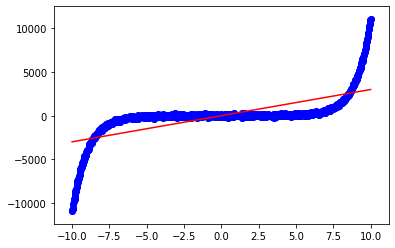

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Activation

x = np.linspace(-10,10,1000).reshape((-1,1))
y = np.sinh(x) + np.random.normal(0,100,x.shape)

w = np.dot(np.linalg.pinv(adapt(x).T.dot(adapt(x))),adapt(x).T.dot(y))
print("Donc le modèle qu'on trouve est : ",w.T)
plt.scatter(x,y)
#Calcul des prédictions
ypred = predictions(w.T,adapt(x))

#Tracage du modèle : 
plt.scatter(x,y,color="blue")
plt.plot(x,ypred,color = "red")

plt.show()

Epoch 1/100
1000/1000 [==============================] - 0s 79us/step - loss: 544.6327
Epoch 2/100
1000/1000 [==============================] - 0s 12us/step - loss: 498.2503
Epoch 3/100
1000/1000 [==============================] - 0s 11us/step - loss: 458.2191
Epoch 4/100
1000/1000 [==============================] - 0s 12us/step - loss: 416.0478
Epoch 5/100
1000/1000 [==============================] - 0s 12us/step - loss: 372.7167
Epoch 6/100
1000/1000 [==============================] - 0s 13us/step - loss: 330.3536
Epoch 7/100
1000/1000 [==============================] - 0s 8us/step - loss: 289.6831
Epoch 8/100
1000/1000 [==============================] - 0s 10us/step - loss: 252.8124
Epoch 9/100
1000/1000 [==============================] - 0s 12us/step - loss: 222.5018
Epoch 10/100
1000/1000 [==============================] - 0s 13us/step - loss: 200.1173
Epoch 11/100
1000/1000 [==============================] - 0s 11us/step - loss: 184.0377
Epoch 12/100
1000/1000 [==================

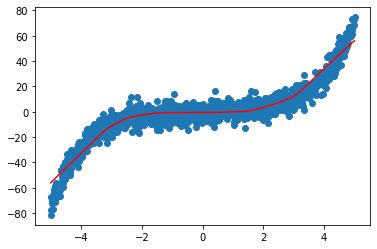

In [88]:
from keras.models import Sequential
from keras.layers import Dense, Activation

x = np.linspace(-5,5,1000).reshape((-1,1))
y = np.sinh(x) + np.random.normal(0,5,x.shape)

model = Sequential([
    Dense(1, input_shape=(1,)),
    Dense(64,),
    Activation('relu'),
    Dense(64,),
    Activation('relu'),
    Dense(1,),
])
model.compile(optimizer='rmsprop',
              loss='mse')
# Train the model, iterating on the data in batches of 32 samples
model.fit(x, y, epochs=100, batch_size=100)
#Calcul des prédictions
y_pred = model.predict(x)
#Tracage du modèle : 

plt.scatter(x,y)
plt.plot(x,y_pred,color="red")

plt.show()

### Manipuler un multi-couche en flat

In [90]:
def sigmoid(x):
    return 1./(1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

class SimpleNeuralControllerNumpy():
    def __init__(self, n_in, n_out, n_hidden_layers=2, n_neurons_per_hidden=5, params=None):
        self.dim_in = n_in
        self.dim_out = n_out
        # if params is provided, we look for the number of hidden layers and neuron per layer into that parameter (a dicttionary)
        if (not params==None):
            if ("n_hidden_layers" in params.keys()):
                n_hidden_layers=params["n_hidden_layers"]
            if ("n_neurons_per_hidden" in params.keys()):
                n_neurons_per_hidden=params["n_neurons_per_hidden"]
        self.n_per_hidden = n_neurons_per_hidden
        self.n_hidden_layers = n_hidden_layers
        self.weights = None 
        self.n_weights = None
        self.init_random_params()
        self.out = np.zeros(n_out)
        #print("Creating a simple mlp with %d inputs, %d outputs, %d hidden layers and %d neurons per layer"%(n_in, n_out,n_hidden_layers, n_neurons_per_hidden))
    def init_random_params(self):
        if(self.n_hidden_layers > 0):
            self.weights = [np.random.random((self.dim_in,self.n_per_hidden))] # In -> first hidden
            self.bias = [np.random.random(self.n_per_hidden)] # In -> first hidden
            for i in range(self.n_hidden_layers-1): # Hidden -> hidden
                self.weights.append(np.random.random((self.n_per_hidden,self.n_per_hidden)))
                self.bias.append(np.random.random(self.n_per_hidden))
            self.weights.append(np.random.random((self.n_per_hidden,self.dim_out))) # -> last hidden -> out
            self.bias.append(np.random.random(self.dim_out))
        else:
            self.weights = [np.random.random((self.dim_in,self.dim_out))] # Single-layer perceptron
            self.bias = [np.random.random(self.dim_out)]
        self.n_weights = np.sum([np.product(w.shape) for w in self.weights]) + np.sum([np.product(b.shape) for b in self.bias])

    def get_parameters(self):
        """
        Returns all network parameters as a single array
        """
        flat_weights = np.hstack([arr.flatten() for arr in (self.weights+self.bias)])
        return flat_weights

    def set_parameters(self, flat_parameters):
        """
        Set all network parameters from a single array
        """
        i = 0 # index
        to_set = []
        self.weights = list()
        self.bias = list()
        if(self.n_hidden_layers > 0):
            # In -> first hidden
            w0 = np.array(flat_parameters[i:(i+self.dim_in*self.n_per_hidden)])
            self.weights.append(w0.reshape(self.dim_in,self.n_per_hidden))
            i += self.dim_in*self.n_per_hidden
            for l in range(self.n_hidden_layers-1): # Hidden -> hidden
                w = np.array(flat_parameters[i:(i+self.n_per_hidden*self.n_per_hidden)])
                self.weights.append(w.reshape((self.n_per_hidden,self.n_per_hidden)))
                i += self.n_per_hidden*self.n_per_hidden
            # -> last hidden -> out
            wN = np.array(flat_parameters[i:(i+self.n_per_hidden*self.dim_out)])
            self.weights.append(wN.reshape((self.n_per_hidden,self.dim_out)))
            i += self.n_per_hidden*self.dim_out
            # Samefor bias now
            # In -> first hidden
            b0 = np.array(flat_parameters[i:(i+self.n_per_hidden)])
            self.bias.append(b0)
            i += self.n_per_hidden
            for l in range(self.n_hidden_layers-1): # Hidden -> hidden
                b = np.array(flat_parameters[i:(i+self.n_per_hidden)])
                self.bias.append(b)
                i += self.n_per_hidden
            # -> last hidden -> out
            bN = np.array(flat_parameters[i:(i+self.dim_out)])
            self.bias.append(bN)
            i += self.dim_out
        else:
            n_w = self.dim_in*self.dim_out
            w = np.array(flat_parameters[:n_w])
            self.weights = [w.reshape((self.dim_in,self.dim_out))]
            self.bias = [np.array(flat_parameters[n_w:])]
        self.n_weights = np.sum([np.product(w.shape) for w in self.weights]) + np.sum([np.product(b.shape) for b in self.bias])
    
    def predict(self,x):
        """
        Propagage
        """
        if(self.n_hidden_layers > 0):
            #Input
            a = np.matmul(x,self.weights[0]) + self.bias[0]
            y = sigmoid(a)
            # hidden -> hidden
            for i in range(1,self.n_hidden_layers-1):
                a = np.matmul(y, self.weights[i]) + self.bias[i]
                y = sigmoid(a)
            # Out
            a = np.matmul(y, self.weights[-1]) + self.bias[-1]
            out = tanh(a)
            return out
        else: # Simple monolayer perceptron
            return tanh(np.matmul(x,self.weights[0]) + self.bias[0])

In [91]:
Network = SimpleNeuralControllerNumpy(10, 1, n_hidden_layers=2, n_neurons_per_hidden=5, params=None)
Network.init_random_params()
print(Network.get_parameters())

[0.02557755 0.5671398  0.21497002 0.04728919 0.56964252 0.73165284
 0.09333229 0.6082839  0.99429592 0.62300035 0.82539897 0.40065153
 0.16685939 0.99712391 0.46530535 0.71013109 0.36950968 0.1093319
 0.70326737 0.38520157 0.00348111 0.05118266 0.39515826 0.8758679
 0.82100046 0.02540987 0.7857896  0.49306146 0.76171054 0.51687534
 0.05404824 0.29465941 0.16999929 0.37091279 0.80283745 0.86134992
 0.95221087 0.75862397 0.03582106 0.99550215 0.84626402 0.94633978
 0.02625807 0.09007702 0.94097679 0.65389621 0.46460413 0.77413415
 0.39619966 0.47674362 0.83531593 0.69796045 0.03692196 0.95596739
 0.94637701 0.27324751 0.23285093 0.52375108 0.31493799 0.49556924
 0.34137088 0.49989939 0.80969563 0.76885513 0.45867942 0.67658231
 0.87986028 0.82309157 0.53143865 0.99954645 0.23717878 0.92906709
 0.20323004 0.65558888 0.70272407 0.93352442 0.24189562 0.77943571
 0.1358692  0.22412566 0.56345609 0.04954412 0.50203549 0.12938799
 0.87749454 0.99678485 0.61186393 0.05388392 0.65833737 0.083134